In [3]:
PARENT_DIR = '../../'
SRC_DIR = '../../src'
DATA_DIR = '/lv_scratch/scratch/graffc0/fire_prediction/data'
EXP_DIR = '/lv_scratch/scratch/graffc0/fire_prediction/experiments'

FIGURES_DIR = '../../reports/figures/final_figures'
SAVE_FIGS = True

import numpy as np
import os
import sys
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load project packages
src_path = os.path.abspath(os.path.join(PARENT_DIR))
if src_path not in sys.path:
    sys.path.append(src_path)
    
src_path = os.path.abspath(os.path.join(SRC_DIR))
if src_path not in sys.path:
    sys.path.append(src_path)
    
from pipeline import train_pipeline
from helper import date_util as du
from helper.multidata_wrapper import MultidataWrapper

from matplotlib import gridspec
import xarray as xr
from tabulate import tabulate
import seaborn as sb


from visualization import mapping as vmap
from helper.geometry import get_default_bounding_box
import helper.loaders as load

from helper.date_util import filter_fire_season

In [4]:
# === Use Seaborn Style ===
import seaborn as sb

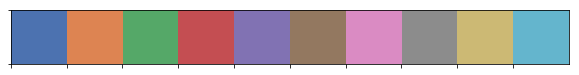

In [5]:
sb.palplot(sb.color_palette("deep", 10))

In [6]:
def set_font(fig_size=(32,10), font_size=14, font_scale=1.6):    
    sb.set(font_scale=font_scale)
    sb.set_style("white")
    sb.set_style("ticks")
    
    plt.rcParams['figure.figsize'] = fig_size
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams["legend.framealpha"] = 0

    font = {'family' : 'STIXGeneral',
            'weight' : 'normal',
            'size'   : font_size}

    plt.rc('font', **font)

### Models

#### Fire-only

In [7]:
%%capture
with open(os.path.join(EXP_DIR, '69880782908836198012098857850619273725.pkl'), 'rb') as fin:
    persistence = pickle.load(fin)

In [8]:
%%capture
with open(os.path.join(EXP_DIR, '187036245380166190001742139280235693281.pkl'), 'rb') as fin:
    persistence_aug = pickle.load(fin)

In [9]:
%%capture
with open(os.path.join(EXP_DIR, '146237455604899902264621647869626389607.pkl'), 'rb') as fin:
    poisson_ar_vpd = pickle.load(fin)

In [9]:
%%capture
with open(os.path.join(EXP_DIR, '316348478308631856755696223978888962051.pkl'), 'rb') as fin:
    poisson_ar_vpd_mem_ar_2 = pickle.load(fin)

In [23]:
%%capture
# exposure
with open(os.path.join(EXP_DIR, '73340252271041023410310721150995023676.pkl'), 'rb') as fin:
    hurdle_poisson_none_active = pickle.load(fin)

In [25]:
%%capture
# exposure
with open(os.path.join(EXP_DIR, '221788113400685355192479259061933622736.pkl'), 'rb') as fin:
    hurdle_poisson_temp_active = pickle.load(fin)

In [21]:
%%capture
# exposure
with open(os.path.join(EXP_DIR, '286324454426313320431787088546845492523.pkl'), 'rb') as fin:
    hurdle_poisson_humid_active = pickle.load(fin)

In [41]:
%%capture
# exposure
with open(os.path.join(EXP_DIR, '80906579005060972229757015510168122792.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_active = pickle.load(fin)

In [29]:
%%capture
# exposure
with open(os.path.join(EXP_DIR, '157273705821271831544375021147353564843.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_rain_active = pickle.load(fin)

In [15]:
%%capture
with open(os.path.join(EXP_DIR, '6338135471354721690642097387704803632.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_rain_wind_active = pickle.load(fin)

In [16]:
%%capture
with open(os.path.join(EXP_DIR, '28251038745933162007372517272669920687.pkl'), 'rb') as fin:
    hurdle_poisson_temp_humid_active = pickle.load(fin)

In [17]:
%%capture
with open(os.path.join(EXP_DIR, '61973568812257386995682439905025810340.pkl'), 'rb') as fin:
    hurdle_poisson_temp_humid_rain_active = pickle.load(fin)

In [20]:
%%capture
with open(os.path.join(EXP_DIR, '193924361112138550033611485986882533654.pkl'), 'rb') as fin:
    hurdle_poisson_temp_humid_rain_wind_active = pickle.load(fin)

In [19]:
%%capture
# exposure
with open(os.path.join(EXP_DIR, '308492481726692584964613090069118666831.pkl'), 'rb') as fin:
    hurdle_poisson_ar_active = pickle.load(fin)

In [24]:
%%capture
# exposure
with open(os.path.join(EXP_DIR, '72292899976276626687878710477757145075.pkl'), 'rb') as fin:
    hurdle_poisson_temp_ar_active = pickle.load(fin)

In [22]:
%%capture
# exposure
with open(os.path.join(EXP_DIR, '185518141895253474379445503947900031835.pkl'), 'rb') as fin:
    hurdle_poisson_humid_ar_active = pickle.load(fin)

In [12]:
%%capture
# exposure
with open(os.path.join(EXP_DIR, '81985911404566139532946861027379744665.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_active = pickle.load(fin)

In [28]:
%%capture
# exposure
with open(os.path.join(EXP_DIR, '78485484457100208725922077874428578782.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_rain_ar_active = pickle.load(fin)

In [26]:
%%capture
with open(os.path.join(EXP_DIR, '271224287304368994710630647237341928282.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_rain_wind_ar_active = pickle.load(fin)

In [27]:
%%capture
with open(os.path.join(EXP_DIR, '37805372608792326347076724582113188528.pkl'), 'rb') as fin:
    hurdle_poisson_temp_humid_ar_active = pickle.load(fin)

In [28]:
%%capture
with open(os.path.join(EXP_DIR, '34899487646457213067963990019914937501.pkl'), 'rb') as fin:
    hurdle_poisson_temp_humid_rain_ar_active = pickle.load(fin)

In [29]:
%%capture
with open(os.path.join(EXP_DIR, '30943523845876400404293237407159981636.pkl'), 'rb') as fin:
    hurdle_poisson_temp_humid_rain_wind_ar_active = pickle.load(fin)

In [30]:
%%capture
with open(os.path.join(EXP_DIR, '.pkl'), 'rb') as fin:
    hurdle_poisson_temp_humid_rain_ar_active = pickle.load(fin)

FileNotFoundError: [Errno 2] No such file or directory: '/lv_scratch/scratch/graffc0/fire_prediction/experiments/.pkl'

In [31]:
%%capture
with open(os.path.join(EXP_DIR, '.pkl'), 'rb') as fin:
    hurdle_poisson_temp_humid_rain_wind_ar_active = pickle.load(fin)

FileNotFoundError: [Errno 2] No such file or directory: '/lv_scratch/scratch/graffc0/fire_prediction/experiments/.pkl'

In [32]:
%%capture
with open(os.path.join(EXP_DIR, '.pkl'), 'rb') as fin:
    hurdle_poisson_temp_humid_rain_wind_ar_active = pickle.load(fin)

FileNotFoundError: [Errno 2] No such file or directory: '/lv_scratch/scratch/graffc0/fire_prediction/experiments/.pkl'

In [33]:
%%capture
with open(os.path.join(EXP_DIR, '.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_decay_10_active_in_sample = pickle.load(fin)


FileNotFoundError: [Errno 2] No such file or directory: '/lv_scratch/scratch/graffc0/fire_prediction/experiments/.pkl'

#### Memory

In [34]:
%%capture
with open(os.path.join(EXP_DIR, '187503006830176924519193688625376793632.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_mem_vpd_1_active = pickle.load(fin)

In [35]:
%%capture
with open(os.path.join(EXP_DIR, '190296682984287501045731410622762896433.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_mem_vpd_2_active = pickle.load(fin)

In [29]:
%%capture
# exposure
with open(os.path.join(EXP_DIR, '175633957822526709906135409875985670939.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_mem_ar_1_active = pickle.load(fin)

In [80]:
%%capture
# exposure
with open(os.path.join(EXP_DIR, '220768078605317236738789539963401335847.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_mem_ar_2_active = pickle.load(fin)

In [38]:
%%capture
with open(os.path.join(EXP_DIR, '135973826631486599616682207171146667405.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_mem_rain_1_active = pickle.load(fin)

In [39]:
%%capture
with open(os.path.join(EXP_DIR, '140090482858563852539626120706168587049.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_mem_vpd_1_ar_1_active = pickle.load(fin)

In [40]:
%%capture
with open(os.path.join(EXP_DIR, '91157102516240878650381215956137491912.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_mem_vpd_2_ar_2_active = pickle.load(fin)

#### Fire + Non-Fire

In [117]:
%%capture
# exposure
with open(os.path.join(EXP_DIR, '135266413705970880186617744887882736471.pkl'), 'rb') as fin:
    poisson_vpd_ar_separated_ac1 = pickle.load(fin)

In [42]:
%%capture
with open(os.path.join(EXP_DIR, '121933084382231497460851683617350627031.pkl'), 'rb') as fin:
    poisson_vpd_ar_joint_ac2 = pickle.load(fin)

In [396]:
%%capture
with open(os.path.join(EXP_DIR, '278279547243867221429613542775291384888.pkl'), 'rb') as fin:
    poisson_all_weather_ar_joint_ac1 = pickle.load(fin)

In [127]:
%%capture
# exposure
with open(os.path.join(EXP_DIR, '59279338110383741468036814170795770130.pkl'), 'rb') as fin:
    poisson_vpd_ar_joint_ac1 = pickle.load(fin)

In [122]:
%%capture
# exposure
with open(os.path.join(EXP_DIR, '245669291565859836167010129763431815153.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_joint_ac1 = pickle.load(fin)

In [44]:
%%capture
with open(os.path.join(EXP_DIR, '140111465048902500791312383672443965764.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_joint_ac2 = pickle.load(fin)

In [7]:
%%capture
# exposure
with open(os.path.join(EXP_DIR, '240994463711502812419865955212820747499.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_separated_ac1 = pickle.load(fin)

In [46]:
%%capture
with open(os.path.join(EXP_DIR, '154948935902817365454148755200156664257.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_separated_ac2 = pickle.load(fin)

In [47]:
%%capture
with open(os.path.join(EXP_DIR, '173916804734214992831816001749422080065.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_mem_vpd_1_separated_ac1 = pickle.load(fin)

In [48]:
%%capture
with open(os.path.join(EXP_DIR, '244345331123075888751439464281610274465.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_mem_vpd_1_separated_ac2 = pickle.load(fin)

In [25]:
%%capture
with open(os.path.join(EXP_DIR, '86656290643801933694839589086888772491.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_mem_ar_1_separated_ac1 = pickle.load(fin)

In [47]:
%%capture
with open(os.path.join(EXP_DIR, '206766040531276311641157700010648347842.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_mem_ar_2_separated_ac1 = pickle.load(fin)

In [40]:
%%capture
with open(os.path.join(EXP_DIR, '24109994353213613935440503683835140047.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_mem_ar_1_separated_ac1_non_exposure_in_sample = pickle.load(fin)

In [50]:
%%capture
with open(os.path.join(EXP_DIR, '133954308146396505772076637291308476229.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_mem_ar_1_separated_ac2 = pickle.load(fin)

In [12]:
%%capture
with open(os.path.join(EXP_DIR, '159602544672647231880348747166795655028.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_ign_humid_mem_ar_1_separated = pickle.load(fin)


In [10]:
%%capture
with open(os.path.join(EXP_DIR, '218640806531587145399054968596841386397.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_vpd_ign_log_vpd_add_separated = pickle.load(fin)


#### Insample

In [51]:
%%capture
with open(os.path.join(EXP_DIR, '211581068556854791078964994863875252205.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_separated_ac1_insample = pickle.load(fin)

In [52]:
%%capture
with open(os.path.join(EXP_DIR, '97306939297919442892363779474565652773.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_separated_ac2_insample = pickle.load(fin)

In [33]:
%%capture
# exposure
with open(os.path.join(EXP_DIR, '195329829256970641980925261906537197825.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_mem_ar_1_separated_ac1_insample = pickle.load(fin)

In [81]:
%%capture
with open(os.path.join(EXP_DIR, '193620227562680004275327195443108511913.pkl'), 'rb') as fin:
    hurdle_hurdle_2 = pickle.load(fin)

AttributeError: Can't get attribute 'active_filter_func' on <module 'models.grid_models' from '/home/graffc/Documents/dev/deployed/fire_prediction/src/models/grid_models.py'>

In [14]:
%%capture
with open(os.path.join(EXP_DIR, '10471308998131267943524994072064546983.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_ign_humid_mem_ar_1_separated_insample = pickle.load(fin)

In [28]:
%%capture
with open(os.path.join(EXP_DIR, '127420428368424131876552734287977772928.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_ign_humid_mem_ar_1_separated_insample_normed = pickle.load(fin)

In [ ]:
%%capture
with open(os.path.join(EXP_DIR, '114843695045788284833823793987976635542.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_vpd_ign_log_vpd_add_separated_insample_normed = pickle.load(fin)

In [26]:
%%capture
with open(os.path.join(EXP_DIR, '114843695045788284833823793987976635542.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_vpd_ign_log_vpd_add_separated_insample = pickle.load(fin)

In [115]:
%%capture
with open(os.path.join(EXP_DIR, '272388725502405520756497190129081328062.pkl'), 'rb') as fin:
    hurdle_poisson_vpd_ar_vpd_ign_log_vpd_add_separated_insample_normed = pickle.load(fin)

### MLP

In [43]:
%%capture
with open(os.path.join(EXP_DIR, '97473021487104227220830998513758320650.pkl'), 'rb') as fin:
    mlp_16_8_vpd_ar = pickle.load(fin)

In [44]:
%%capture
with open(os.path.join(EXP_DIR, '164275171340890396031206929892701589538.pkl'), 'rb') as fin:
    mlp_16_8_vpd_ar_mem_2 = pickle.load(fin)

In [49]:
%%capture
with open(os.path.join(EXP_DIR, '89410309255446961477108260961862983677.pkl'), 'rb') as fin:
    mlp_16_8_all_mem_temp_humid_1 = pickle.load(fin)

### Data

In [13]:
# === Load data ===

# Load grid data
file_str = os.path.join(DATA_DIR, 'processed/grid/grid_ds_era_4_modis_alaska_2007-01-01_2016-12-31_interpolate_0roff_%dk.nc')
in_files = {k: file_str % k for k in range(1,6)}

start_date = dt.date(2007,1,1)
end_date = dt.date(2016,12,31)
forecast_horizon = 5

params = hurdle_poisson_vpd_ar_active['params']
params['filter_mask'] = 'no_ocean'
params['memory_type'] = 'decay'
params['memory_covariates'] = ('temperature', 'humidity', 'wind', 'rain', 'vpd',)
params['memory_length']  = 10

X_grid_dict_nw, y_grid_dict, _, _, _ = train_pipeline.setup_data(in_files, start_date, end_date, forecast_horizon, params)

# Load Modis
modis_df = pd.read_pickle(os.path.join(DATA_DIR, 'interim/modis/fire/fire_modis_alaska_2007-2016.pkl'))
modis_df = modis_df.assign(datetime_local=list(map(lambda x: du.utc_to_local_time(x[0], x[1], du.round_to_nearest_quarter_hour), zip(modis_df.datetime_utc, modis_df.lon))))

380 300
areas top [ 1018.46641192  1018.46641192  1018.46641192  1018.46641192  1018.46641192
  1018.46641192  1018.46641192  1018.46641192  1018.46641192  1018.46641192
  1018.46641192  1018.46641192  1018.46641192  1018.46641192  1018.46641192
  1018.46641192  1018.46641192  1018.46641192  1018.46641192  1018.46641192
  1018.46641192  1018.46641192  1018.46641192  1018.46641192  1018.46641192
  1018.46641192  1018.46641192  1018.46641192  1018.46641192  1018.46641192
  1018.46641192  1018.46641192  1018.46641192  1018.46641192  1018.46641192
  1018.46641192  1018.46641192  1018.46641192  1018.46641192  1018.46641192
  1018.46641192  1018.46641192  1018.46641192  1018.46641192  1018.46641192
  1018.46641192  1018.46641192  1018.46641192  1018.46641192  1018.46641192
  1018.46641192  1018.46641192  1018.46641192  1018.46641192  1018.46641192]
areas bottom [ 1782.89253668  1782.89253668  1782.89253668  1782.89253668  1782.89253668
  1782.89253668  1782.89253668  1782.89253668  1782.8925

### Masks

In [14]:
alaska_interior_mask_src = os.path.join('/extra/graffc0/fire_prediction/data', 'processed/masks/alaska_interior_mask_05.nc')
alaska_interior_mask = xr.open_dataset(alaska_interior_mask_src)

weather_proc_region_src = os.path.join('/extra/graffc0/fire_prediction/data', 'interim/gfs/weather_proc/4/weather_proc_gfs_4_alaska_2007-2016.pkl')
weather_proc_region = load.load_pickle(weather_proc_region_src)

mask = np.zeros(X_grid_dict_nw[1][0].temperature_1.values.shape[0:2], dtype=bool)

lats, lons = weather_proc_region.bounding_box.make_grid(inclusive_lon=True)
for i in range(alaska_interior_mask.mask_Int_05.shape[0]):
    for j in range(alaska_interior_mask.mask_Int_05.shape[1]):
        lat = alaska_interior_mask.Lat_AK_05.values[i,j] + .25
        lon = alaska_interior_mask.Lon_AK_05.values[i,j] - .25

        if alaska_interior_mask.mask_Int_05[i,j] == 1:
            u = np.where(lats[:,0]==lat)[0][0]
            v = np.where(lons[0,:]==lon)[0][0]
            mask[u,v] = 1

alaska_interior_mask = mask

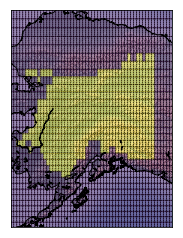

In [12]:
mp = vmap.make_map(weather_proc_region.bounding_box, (0, .5, 0, .5))
mp.shadedrelief()

values = alaska_interior_mask
lats, lons = weather_proc_region.bounding_box.make_grid(inclusive_lon=True)

cs = mp.pcolormesh(lons, lats , values, latlon=True, alpha=.4)

In [58]:
weather_proc_region.bounding_box.make_grid(inclusive_lon=True)[1][0,:]

array([-165. , -164.5, -164. , -163.5, -163. , -162.5, -162. , -161.5,
       -161. , -160.5, -160. , -159.5, -159. , -158.5, -158. , -157.5,
       -157. , -156.5, -156. , -155.5, -155. , -154.5, -154. , -153.5,
       -153. , -152.5, -152. , -151.5, -151. , -150.5, -150. , -149.5,
       -149. , -148.5, -148. , -147.5, -147. , -146.5, -146. , -145.5,
       -145. , -144.5, -144. , -143.5, -143. , -142.5, -142. , -141.5,
       -141. , -140.5, -140. , -139.5, -139. , -138.5, -138. ])

In [50]:
weather_proc_region_src = os.path.join('/extra/graffc0/fire_prediction/data', 'interim/gfs/weather_proc/4/weather_proc_gfs_4_alaska_2007-2016.pkl')
weather_proc_region = load.load_pickle(weather_proc_region_src)

LAT_HI,LON_HI = (69,-141)
LAT_LO,LON_LO = (62,-161)

mask = np.zeros(X_grid_dict_nw[1][0].temperature_1.values.shape[0:2], dtype=bool)

lats, lons = weather_proc_region.bounding_box.make_grid(inclusive_lon=True)
for i,lat in enumerate(lats[:,0]):
    for j,lon in enumerate(lons[0,:]):
        if LAT_LO <= lat <= LAT_HI and LON_LO <= lon <= LON_HI:
            mask[i,j] = 1

alaska_interior_mask_2 = mask

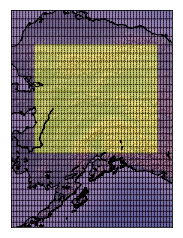

In [60]:
mp = vmap.make_map(weather_proc_region.bounding_box, (0, .5, 0, .5))
mp.shadedrelief()

values = alaska_interior_mask_2
lats, lons = weather_proc_region.bounding_box.make_grid(inclusive_lon=True)

cs = mp.pcolormesh(lons, lats , values, latlon=True, alpha=.4)

### Figures

In [30]:
FIG_REG_WIDTH = 7
FIG_REG_ASPECT_RATIO = 1.75

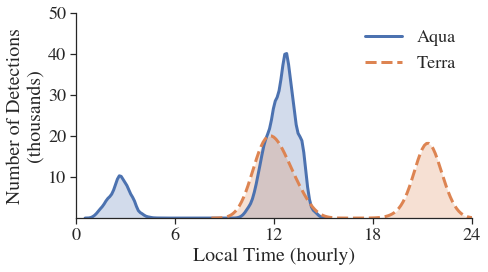

In [241]:
set_font((FIG_REG_WIDTH,FIG_REG_WIDTH/FIG_REG_ASPECT_RATIO))

# Helper functions MODIS
def dt_to_hours_frac(dt):
    return dt.hour + (dt.minute / 60.)

times_terra = list(map(dt_to_hours_frac, modis_df[modis_df.sat=='T'].datetime_local))
times_aqua = list(map(dt_to_hours_frac, modis_df[modis_df.sat=='A'].datetime_local))

# Plot a KDE of the times of measurements across all of Alaska (Aqua vs Terra)
fig = sb.kdeplot(times_aqua, clip=(0,24), shade=True, label='Aqua', lw=3)
sb.kdeplot(times_terra, clip=(0,24), shade=True, label='Terra', ls='--', lw=3)

plt.xlim(0,24)

y_ticks = np.array([10, 20, 30, 40, 50])*1000
plt.yticks(y_ticks/len(modis_df), y_ticks.astype(int)//1000)

plt.xticks(range(0,24+1,6))

#_ = plt.title('Time distribution of fire detections')
_ = plt.xlabel('Local Time (hourly)')
_ = plt.ylabel('Number of Detections\n(thousands)')

plt.tight_layout()

sb.despine()

if SAVE_FIGS:
    plt.savefig(os.path.join(FIGURES_DIR, 'aqua_terra_detection_times.pdf'))

(511, 31, 10)
0.653103072797
0.00273928906135


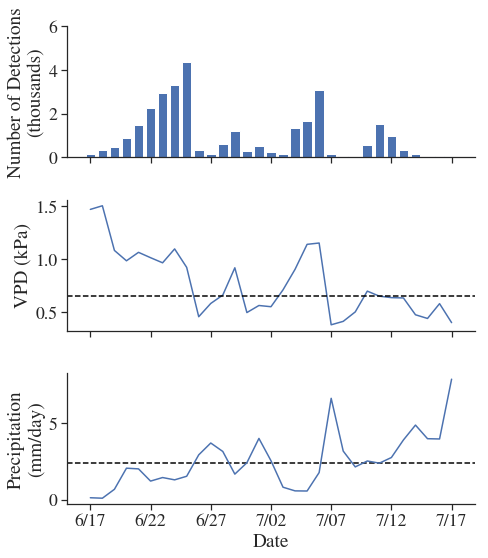

In [36]:
set_font((FIG_REG_WIDTH,FIG_REG_WIDTH/FIG_REG_ASPECT_RATIO*2))

MM_TO_M = 1000

YEAR = 2015

OFF1 = 34
OFF2 = -45

start_ind = 110*(YEAR-2007)+OFF1
end_ind = 110*(1+(YEAR-2007))+OFF2

fig = plt.figure()
gs = gridspec.GridSpec(3,1, height_ratios=[1,1,1])

# === Num. of Detections
ax = plt.subplot(gs[0])
num_det = X_grid_dict_nw[1][0].num_det.values
ax.bar(np.arange(start_ind,end_ind), np.sum(num_det, axis=(0,1))[start_ind:end_ind])

plt.yticks(ax.get_yticks(), np.array(ax.get_yticks()).astype(int)//1000)

#plt.title('Daily Detections vs. Weather Variables')
plt.ylabel('Number of Detections\n(thousands)')

ticks_pos = np.arange(start_ind,end_ind,5)
months, days = X_grid_dict_nw[1][0].time.dt.month, X_grid_dict_nw[1][0].time.dt.day
date_strings = ['%d/%02d' % (month,day) for (month,day) in zip(months,days)]
plt.setp(ax.get_xticklabels(), visible=False)

# === Temperature
"""
ax = plt.subplot(gs[1], sharex=ax)
plt.plot(np.arange(start_ind,end_ind), np.mean(temp[mask], axis=(0))[start_ind:end_ind]-273.15)

plt.ylabel('Temp. ($\degree$C)')
plt.setp(ax.get_xticklabels(), visible=False)




# === Humidity
ax = plt.subplot(gs[2], sharex=ax)
ax.plot(np.arange(start_ind,end_ind), np.mean(humid[mask], axis=(0))[start_ind:end_ind])

plt.ylabel('Rel. Humid. (%)')
plt.setp(ax.get_xticklabels(), visible=False)
"""

# === VPD
vpd = np.mean(X_grid_dict_nw[1][0].vpd.values[alaska_interior_mask][:,start_ind-OFF1:end_ind-OFF2], axis=(0))[OFF1:OFF2]


period_vpd = np.empty((np.sum(alaska_interior_mask),(110+OFF2)-OFF1,10))
period_rain = np.empty((np.sum(alaska_interior_mask),(110+OFF2)-OFF1,10))

print(period_vpd.shape)
for i,year in enumerate(range(2007,2016+1)):
    period_vpd[:,:,i] = X_grid_dict_nw[1][0].vpd.values[alaska_interior_mask][:,110*(year-2007)+OFF1:110*(1+(year-2007))+OFF2]
    period_rain[:,:,i] = X_grid_dict_nw[1][0].rain.values[alaska_interior_mask][:,110*(year-2007)+OFF1:110*(1+(year-2007))+OFF2]

#mean_vpd = np.mean(X_grid_dict_nw[1][0].vpd.values[alaska_interior_mask])#[:,start_ind:end_ind])
mean_vpd = np.mean(period_vpd)
print(mean_vpd)


ax = plt.subplot(gs[1], sharex=ax)
ax.plot(np.arange(start_ind,end_ind), vpd, label='Observed')
plt.axhline(y=mean_vpd, color='black', linestyle='--', label='Mean')
plt.ylabel('VPD (kPa)')
plt.setp(ax.get_xticklabels(), visible=False)

# === Rain
ax = plt.subplot(gs[2], sharex=ax)
plt.axhline(y=mean_rain*MM_TO_M, color='black', linestyle='--', label='Mean')
rain = np.mean(X_grid_dict_nw[1][0].rain.values[alaska_interior_mask][:,start_ind-OFF1:end_ind-OFF2]*MM_TO_M, axis=(0))[OFF1:OFF2]
#mean_rain = np.mean(X_grid_dict_nw[1][0].rain.values[alaska_interior_mask])#[:,start_ind:end_ind])
mean_rain = np.mean(period_rain)
print(mean_rain)

plt.plot(np.arange(start_ind,end_ind), rain)

plt.ylabel('Precipitation\n(mm/day)')


plt.xlabel('Date')
_ = plt.xticks(ticks_pos, date_strings[start_ind:end_ind:5])
plt.tight_layout()


sb.despine()

if SAVE_FIGS:
    plt.savefig(os.path.join(FIGURES_DIR, 'num_det_weather_timeseries_2015_means.pdf'))

In [19]:
years = np.arange(2007, 2017)


temp = X_grid_dict_nw[1][0].temperature_1.values
humid = X_grid_dict_nw[1][0].humidity_1.values
det = X_grid_dict_nw[1][0].num_det.values
rain = X_grid_dict_nw[1][0].rain_1.values

# Add climate
temp_years = []
humid_years = []
num_det = []
for year in years:
    temp_years.append(np.mean(temp[alaska_interior_mask][:,110*(year-2007):110*(1+year-2007)])-273.15)
    
    humid_years.append(np.mean(humid[alaska_interior_mask][:, 110*(year-2007):110*(1+year-2007)]))
    
    
    num_det.append(np.sum(det[:,:, 110*(year-2007):110*(1+year-2007)]))
    

temp_a = list(temp_years - np.mean(temp_years))
humid_a = list(humid_years - np.mean(humid_years))

# Add means and std dev
num_det += [np.mean(num_det), np.std(num_det)]
#temp += [np.mean(temp), np.std(temp)]
#humid += [np.mean(humid), np.std(humid)]
temp_a += [np.mean(temp_years), np.std(temp_years)]
humid_a += [np.mean(humid_years), np.std(humid_years)]

# Round values
num_det = list(map(lambda x: int(x), num_det))
temp_a = list(map(lambda x: round(x, 1), temp_a))
humid_a = list(map(lambda x: round(x, 1), humid_a))

headers = ['Year', 'Number of Detections', 'Temperature Anomaly ($\degree$C$)', 'Humidity Anomaly (%)']
list(years) + ['Mean', 'Std.']

rows = []
for i,year in enumerate(years):
    row = [year, num_det[i], temp_a[i], humid_a[i]]
    rows.append(row)

rows.append(['Mean', num_det[i+1], temp_a[i+1], humid_a[i+1]])
rows.append(['Std. Dev.', num_det[i+2], temp_a[i+2], humid_a[i+2]])

print(tabulate(rows, headers=headers, tablefmt='latex', floatfmt='.1f'))

\begin{tabular}{lrrr}
\hline
 Year      &   Number of Detections &   Temperature Anomaly (\$\textbackslash{}degree\$C\$) &   Humidity Anomaly (\%) \\
\hline
 2007      &                   3973 &                                 1.0 &                    1.2 \\
 2008      &                    887 &                                -1.4 &                    0.7 \\
 2009      &                  29310 &                                 0.1 &                   -3.0 \\
 2010      &                   7386 &                                 0.3 &                    2.8 \\
 2011      &                   1635 &                                -0.5 &                    1.1 \\
 2012      &                   1334 &                                -0.6 &                    1.3 \\
 2013      &                   9310 &                                 0.8 &                   -3.9 \\
 2014      &                   1103 &                                -0.7 &                   -0.9 \\
 2015      &               

In [20]:
def generate_four_plot(X, total=False, normed=True, filter_ocean=True):
    table = [['Sustained', 'Extinction', 'Ignition', 'Quiescent']]
    header = list(range(1,6))
    for k in range(1,6):
        num_det = X[k][0].num_det.values
        num_det_target = X[k][0].num_det_target.values
        
        non_ocean = X[k][0].filter_mask.values
        
        if filter_ocean:
            num_det = num_det[non_ocean]
            num_det_target = num_det_target[non_ocean]

        act = (num_det>0)
        to_act = (num_det_target>0)
        non = (num_det==0)
        to_non = (num_det_target==0)

        act_to_act = act & to_act
        act_to_non = act & to_non

        non_to_act = non & to_act
        non_to_non = non & to_non

        total_size = num_det.size
        
        vals = list(map(np.sum, [act_to_act, act_to_non, non_to_act, non_to_non]))
        
        if normed:
            act_total = np.sum(act_to_act) + np.sum(act_to_non)
            nonact_total = np.sum(non_to_act) + np.sum(non_to_non)
            vals[0] = np.array(vals[0])/act_total*100
            vals[1] = np.array(vals[1])/act_total*100
            vals[2] = np.array(vals[2])/nonact_total*100
            vals[3] = np.array(vals[3])/nonact_total*100
        elif not total:
            vals = np.array(vals)/total_size*100
        else:
            vals = list(map(np.sum, [act_to_act, act_to_non, non_to_act, non_to_non]))
        
        print('Active: %f, Non-active %f' % (np.sum(act_to_act+act_to_non)/total_size, 
                                             np.sum(non_to_act+non_to_non)/total_size) )
    
        if total:
            vals = list(map(lambda x: format(x, 'd'), vals))
        else:
            vals = list(map(lambda x: "{:.2f}%".format(np.round(x,2)), vals))
        
        table.append(list(vals))
    
    print(tabulate(zip(*table), headers=header, tablefmt='latex'))

In [21]:
generate_four_plot(X_grid_dict_nw, False, True, filter_ocean=True)

Active: 0.004908, Non-active 0.995092
Active: 0.004908, Non-active 0.995092
Active: 0.004908, Non-active 0.995092
Active: 0.004908, Non-active 0.995092
Active: 0.004908, Non-active 0.995092
\begin{tabular}{llllll}
\hline
            & 1      & 2      & 3      & 4      & 5      \\
\hline
 Sustained  & 60.33\% & 47.38\% & 38.61\% & 33.03\% & 29.67\% \\
 Extinction & 39.67\% & 52.62\% & 61.39\% & 66.97\% & 70.33\% \\
 Ignition   & 0.20\%  & 0.26\%  & 0.30\%  & 0.33\%  & 0.35\%  \\
 Quiescent  & 99.80\% & 99.74\% & 99.70\% & 99.67\% & 99.65\% \\
\hline
\end{tabular}


7094
1438306


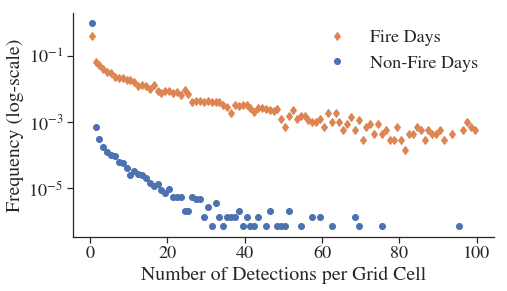

In [242]:
set_font((FIG_REG_WIDTH,FIG_REG_WIDTH/FIG_REG_ASPECT_RATIO))

BINS = 100

fig = plt.figure()

ocean = X_grid_dict_nw[1][0].filter_mask.values.flatten()
values_flat = X_grid_dict_nw[1][0].num_det_target.values.flatten()[ocean]
ign = (X_grid_dict_nw[1][0].num_det.values.flatten()==0)[ocean]

values_active_flat = values_flat[~ign]

print(values_active_flat.size)
y,binEdges=np.histogram(values_active_flat,bins=BINS, density=True,range=(0,100))
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

bincenters = bincenters[y>0]
y = y[y>0]

plt.semilogy(bincenters,y,'d', label='Fire Days', color=sb.color_palette()[1])

values_inactive_flat = values_flat[ign]

print(values_inactive_flat.size)
y,binEdges=np.histogram(values_inactive_flat,bins=BINS,density=True,range=(0,100))
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

bincenters = bincenters[y>0]
y = y[y>0]

plt.semilogy(bincenters,y,'o', label='Non-Fire Days', color=sb.color_palette()[0])

_ = plt.xlabel('Number of Detections per Grid Cell')
_ = plt.ylabel('Frequency (log-scale)')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

map(lambda x: x.set_yscale('log'), fig.get_axes())
plt.legend()

plt.minorticks_off()


sb.despine()

if SAVE_FIGS:
    plt.savefig(os.path.join(FIGURES_DIR, 'active_ignition_freq_hist3.pdf'))

In [39]:

def plot_active_ignition(results_dict, measurements, scale=False, markers=None, sample='test', label=None,
                         baseline=None, colors=None,
                         min_y=None, y_labels=None, col_len=2, marker_size=10, legend_func=None, rescale=False,
                         skill_score=True):
    axs = []
    num_plots = len(measurements)
    gs = gridspec.GridSpec(int(np.ceil(num_plots/col_len)), col_len)
    fig = plt.figure()
    
    ax = None
    
    for i, (name,meas,share,use_baseline) in enumerate(measurements):            
        row = i//col_len
        col = int(np.remainder(i,col_len))
        col_ind1 = col*col_len
        col_ind2 = (col+1)*col_len
    
        if (i == len(measurements)-1) and (np.remainder(i,2)==0) and col_len > 1:
            col_ind1 = col*col_len + 1
            col_ind2 = (col+1)*col_len + 1
        if scale and share:
            ax = fig.add_subplot(gs[row, col_ind1:col_ind2], sharex=ax, sharey=ax)
        else:
            ax = fig.add_subplot(gs[row, col_ind1:col_ind2], sharex=ax)
        
        if i != len(measurements)-1:
            plt.setp(ax.get_xticklabels(), visible=False)
        
        axs.append(ax)
        
        if colors:
            all_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
            all_colors[:len(colors)] = colors
            plt.gca().set_prop_cycle(color=all_colors)
    
        if i == len(measurements)-1:
            plt.xlabel('Lead Time $(k)$')
        plt.title(name)
        if y_labels:
            plt.ylabel(y_labels[i])
        elif np.remainder(i,col_len)==0:
            if label:
                plt.ylabel(label)
            elif scale:
                plt.ylabel('MSE')
            else:
                plt.ylabel('RMSE')
                
        for j,(k,v) in enumerate(results_dict.items()):
            marker = '-'
            if markers is not None:
                marker += markers[j]
                
            results = v[sample][meas][1][1:]  
            if scale:                
                try:
                    scale_factor = v[sample][meas][2] 
                except:
                    scale_factor = [1] * len(results)
                    
                if rescale:
                    scale_factor = list(np.array(scale_factor) / np.array(rescale))
                #results = np.sqrt(np.array(results)**2 * scale[name])
                results = np.array(results)**2 * np.array(scale_factor)
            else:
                results = np.array(results)#**2
            
            if baseline is not None and use_baseline:
                # plt.axhline(0, ls='--', color="black")
                if k == baseline:
                    # Skip color for baseline
                    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
                    plt.gca().set_prop_cycle(color=colors[1:])
                    continue
                baseline_results = results_dict[baseline][sample][meas][1][1:]  
                if scale:                
                    try:
                        scale_factor = results_dict[baseline][sample][meas][2] 
                    except:
                        scale_factor = [1] * len(baseline_results)
                    baseline_results = np.array(baseline_results) * np.array(scale_factor)
                else:
                    baseline_results = np.array(baseline_results)#**2
                
                print('B', baseline_results)
                print('R', results)
            
                if skill_score:
                    results = ((baseline_results - results) / baseline_results) * 100
                else:
                    results = baseline_results - results
                #results = 100 - results
                #plt.ylabel('100 - MSE SS %')
                
            x = range(1,len(results)+1)
            plt.plot(x, results, marker, label=k, markersize=marker_size)
            print(results,k)
            plt.xticks(x)
            
        if min_y is not None:
            y_min,y_max = plt.ylim()
            plt.ylim(min_y, y_max)
            
        
            
        if 'SS' in y_labels[i]:
            #ticks, _ = plt.yticks()
            ticks = [0,20,40]
            #print(ticks)
            plt.yticks(ticks,list(map(lambda x: str(x)+'%', ticks)))
            
        if (i==(col_len-1)) or (len(measurements)==1):
        #if (i==(col_len)) or (len(measurements)==1):
            #_ = plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
            #
            if legend_func:
                legend_func()
            else:
                _ = plt.legend()
                
    gs.tight_layout(fig)
    fig.align_ylabels(axs)
    return axs
    

[ 20.65817346  21.47121326  20.27279812  19.25507224  18.79353581] AR-only
[ 22.43535943  21.05964553  19.35782169  18.24137918  17.89233051] VPD-only
[ 20.41605715  20.33521622  18.98363507  17.76974608  17.59259303] VPD + AR


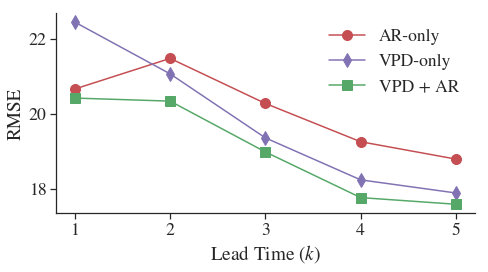

In [38]:
set_font((FIG_REG_WIDTH,FIG_REG_WIDTH/FIG_REG_ASPECT_RATIO))

results_dict = {#'Persistence': persistence['summary_results'],
                #'Persistence Aug (VPD)': persistence_aug['summary_results'],
                #'Poisson (AR + Weather)': poisson_ar_weather['summary_results'],    
                'AR-only': hurdle_poisson_ar_active['summary_results'],
                'VPD-only': hurdle_poisson_vpd_active['summary_results'],
                'VPD + AR': hurdle_poisson_vpd_ar_active['summary_results'],
}
measurements = [('','root_mean_squared_error_active', False, False),
                #('','root_mean_squared_error_extinction_target', False, False),
               ]

alpha = 0.0049727
legend_func = None#lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=3, mode="expand", borderaxespad=0.)
plot_active_ignition(results_dict, measurements, baseline='Persistence', scale=False,
                     rescale=hurdle_poisson_vpd_active['summary_results']['test']['root_mean_squared_error_active'][2],
                     markers=['o', 'd', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     colors=[sb.color_palette()[3], sb.color_palette()[4], sb.color_palette()[2]],
                     #colors=['#d62728', '#7f7f7f'],
                     y_labels = ['RMSE', 'MSE SS$_{Persistence}$'], col_len=1, legend_func=legend_func)


sb.despine()

if SAVE_FIGS:
    plt.savefig(os.path.join(FIGURES_DIR, 'mse_active_models_poisson_input.pdf'))

In [32]:
no_ar = [hurdle_poisson_none_active, hurdle_poisson_temp_active , hurdle_poisson_humid_active, hurdle_poisson_vpd_active, 
         hurdle_poisson_vpd_rain_active]
         
         # hurdle_poisson_vpd_rain_wind_active,
         # hurdle_poisson_temp_humid_active, hurdle_poisson_temp_humid_rain_active, hurdle_poisson_temp_humid_rain_wind_active]
ar =    [hurdle_poisson_ar_active, hurdle_poisson_temp_ar_active , hurdle_poisson_humid_ar_active, hurdle_poisson_vpd_ar_active, 
         hurdle_poisson_vpd_rain_ar_active]
         
         
         # hurdle_poisson_vpd_rain_wind_ar_active,
         # hurdle_poisson_temp_humid_ar_active, hurdle_poisson_temp_humid_rain_ar_active, hurdle_poisson_temp_humid_rain_wind_ar_active]
names = ['None', 'Temperature', 'Humidity', 'VPD', 'VPD, Rain', 'VPD, Rain, Wind', 'Temperature, Humidity', 'Temperature, Humidity, Rain', 'Temp, Humid, Rain, Wind']
table = []
for n,v,v2 in zip(names,no_ar,ar):
    table.append((n,np.round(v['summary_results']['test']['root_mean_squared_error_active'][1][0],2),np.round(v2['summary_results']['test']['root_mean_squared_error_active'][1][0],2)))
    
table = tabulate(table,tablefmt='latex', floatfmt='.1f')
print(table)

\begin{tabular}{lrr}
\hline
 None        & 21.0 & 20.1 \\
 Temperature & 19.9 & 19.2 \\
 Humidity    & 20.1 & 19.3 \\
 VPD         & 19.8 & 19.0 \\
 VPD, Rain   & 19.8 & 19.0 \\
\hline
\end{tabular}


In [552]:
ar =    [hurdle_poisson_vpd_ar_mem_vpd_1_active, hurdle_poisson_vpd_ar_mem_vpd_2_active,
         hurdle_poisson_vpd_ar_mem_ar_1_active, hurdle_poisson_vpd_ar_mem_ar_2_active,
         hurdle_poisson_vpd_ar_mem_rain_1_active, hurdle_poisson_vpd_ar_mem_vpd_1_ar_1_active, 
         hurdle_poisson_vpd_ar_mem_vpd_2_ar_2_active]
names = ['vpd1', 'vpd2', 'ar1', 'ar2', 'rain1', 'vpd_ar1', 'vpd_ar2']
table = []
for n,v2 in zip(names,ar):
    table.append((n,np.round(v2['summary_results']['test']['root_mean_squared_error_active'][1][0]**2,2)))
    
table = tabulate(table,tablefmt='latex', floatfmt='.0f')
print(table)

\begin{tabular}{lr}
\hline
 vpd1    & 358 \\
 vpd2    & 358 \\
 ar1     & 361 \\
 ar2     & 360 \\
 rain1   & 360 \\
 vpd\_ar1 & 358 \\
 vpd\_ar2 & 357 \\
\hline
\end{tabular}


[ 24.87954063  27.74375782  28.29762727  28.13490999  28.15765255] Persistence
[ 27.27097679  25.30564783  23.98780191  22.41757212  22.88508235] Mod. Persistence
[ 20.41605715  20.33521622  18.98363507  17.76974608  17.59259303] Poisson Hurdle 
[ 20.59175429  20.61121508  19.15150351  18.11827869  18.1637551 ] Multi-layer Perceptron
B [ 24.87954063  27.74375782  28.29762727  28.13490999  28.15765255]
R [ 27.27097679  25.30564783  23.98780191  22.41757212  22.88508235]
[ -9.61205912   8.78795875  15.23034182  20.32115218  18.72517671] Mod. Persistence
B [ 24.87954063  27.74375782  28.29762727  28.13490999  28.15765255]
R [ 20.41605715  20.33521622  18.98363507  17.76974608  17.59259303]
[ 17.94037739  26.70345398  32.91439282  36.84093505  37.52109485] Poisson Hurdle 
B [ 24.87954063  27.74375782  28.29762727  28.13490999  28.15765255]
R [ 20.59175429  20.61121508  19.15150351  18.11827869  18.1637551 ]
[ 17.23418616  25.70863971  32.32116839  35.60214448  35.49265137] Multi-layer Perc

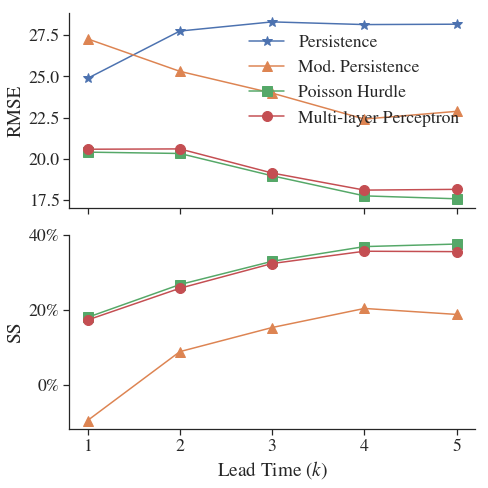

In [42]:
set_font((FIG_REG_WIDTH,FIG_REG_WIDTH/FIG_REG_ASPECT_RATIO*1.75))

results_dict = {'Persistence': persistence['summary_results'],
                'Mod. Persistence': persistence_aug['summary_results'],
                #'Poisson (AR + Weather)': poisson_ar_weather['summary_results'],
                #'Hurdle (VPD)': hurdle_poisson_vpd_active['summary_results'],
                'Poisson Hurdle ': hurdle_poisson_vpd_ar_active['summary_results'],
                #'Hurdle (AR)': hurdle_poisson_ar_active['summary_results']
                'Multi-layer Perceptron': mlp_16_8['summary_results']
}
measurements = [('','root_mean_squared_error_active', False, False),
                ('','root_mean_squared_error_active', False, True),
               ]

alpha = 0.0049727
#legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
legend_func = lambda : plt.legend(loc='upper right', bbox_to_anchor=(1,.97))
plot_active_ignition(results_dict, measurements, baseline='Persistence', scale=False,
                     rescale=hurdle_poisson_vpd_active['summary_results']['test']['root_mean_squared_error_active'][2],
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     y_labels = ['RMSE', 'SS'], col_len=1, legend_func=legend_func)

sb.despine()

if SAVE_FIGS:
    plt.savefig(os.path.join(FIGURES_DIR, 'mse_active_models_active_eval_ss.pdf'))

[ 30.41529144  33.63006918  35.62913408  38.19407055  39.73809148] Persistence
[ 33.70725387  32.81081721  34.7768899   34.10888259  36.06975237] Mod. Persistence
[ 25.21745383  28.27419258  29.25918999  29.67298056  30.96484843] Poisson Hurdle
[ 12.38652832  21.08201555  22.49417835  21.50652028  21.47340298] Persistence
[ 12.11479153  15.73745196  13.29137403  13.29037821  13.99150293] Mod. Persistence
[ 9.14136918  8.12825783  6.97158292  6.10458838  5.96085771] Poisson Hurdle


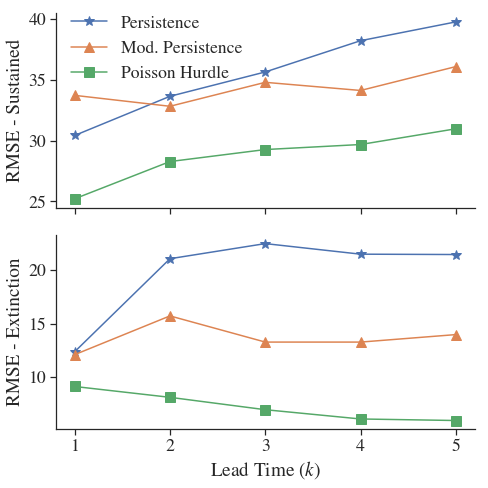

In [45]:
set_font((FIG_REG_WIDTH,FIG_REG_WIDTH/FIG_REG_ASPECT_RATIO*1.75))


results_dict = {'Persistence': persistence['summary_results'],
                'Mod. Persistence': persistence_aug['summary_results'],
                #'Poisson (AR + Weather)': poisson_ar_weather['summary_results'],
                #'Hurdle (VPD)': hurdle_poisson_vpd_active['summary_results'],
                'Poisson Hurdle': hurdle_poisson_vpd_ar_active['summary_results'],
                #'Hurdle (AR)': hurdle_poisson_ar_active['summary_results']
}
measurements = [('','root_mean_squared_error_active_target', False, False),
                ('','root_mean_squared_error_extinction_target', False, False),
               ]

alpha = 0.0049727
# legend_func = lambda : plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
legend_func = lambda : plt.legend(loc='upper left', bbox_to_anchor=(0,1.07))

plot_active_ignition(results_dict, measurements, baseline='Persistence', scale=False,
                     rescale=hurdle_poisson_vpd_ar_active['summary_results']['test']['root_mean_squared_error_active'][2],
                     markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                     y_labels = ['RMSE - Sustained', 'RMSE - Extinction'], col_len=1, legend_func=legend_func)

sb.despine()

if SAVE_FIGS:
    plt.savefig(os.path.join(FIGURES_DIR, 'active_seperate_mse_active_eval_unnormalized.pdf'))

In [30]:
def print_afm_igm_coeff(models, ks):
    for k in ks:
        rows = []
        
        print('k=', k)
        model = models[k-1][0]
        
        afm = model.afm.model
        
        rows.append(['Poisson - Sustain'] + list(map(lambda x: np.round(x, 2), afm.fit_result_positive.params)))
        rows.append(['Hurdle - Extinction'] + list(map(lambda x: np.round(x, 2),afm.fit_result_inflated.params)))
        rows.append([])
        
        igm = model.igm.model        
        
        rows.append(['Poisson - Ignition'] + list(map(lambda x: np.round(x, 2), igm.fit_result_positive.params)))
        rows.append(['Hurdle - Quiescent'] + list(map(lambda x: np.round(x, 2),igm.fit_result_inflated.params)))
        
        
        print(tabulate(rows, headers=(['Model'] + list(afm.fit_result_positive.params._index)), tablefmt='latex',
                       floatfmt='.2f'))
        print()

In [67]:
print_afm_igm_coeff(hurdle_poisson_vpd_ar_mem_ar_2_active_insample['models'], [1,5])

NameError: name 'hurdle_poisson_vpd_ar_mem_ar_2_active_insample' is not defined

In [288]:
print_afm_igm_coeff(hurdle_poisson_vpd_ar_separated_ac2_insample['models'], [1,5])

k= 1
\begin{tabular}{lrrr}
\hline
 Model               &   Intercept &   vpd &   num\_det \\
\hline
 Poisson - Sustain   &        2.29 &  0.16 &      0.59 \\
 Hurdle - Extinction &        0.06 & -0.45 &     -1.11 \\
                     &             &       &           \\
 Poisson - Ignition  &        1.31 &  0.16 &           \\
 Hurdle - Quiescent  &        6.77 & -0.66 &           \\
\hline
\end{tabular}

k= 5
\begin{tabular}{lrrr}
\hline
 Model               &   Intercept &   vpd &   num\_det \\
\hline
 Poisson - Sustain   &        2.44 &  0.34 &      0.24 \\
 Hurdle - Extinction &        1.30 & -0.96 &     -0.49 \\
                     &             &       &           \\
 Poisson - Ignition  &        1.90 &  0.23 &           \\
 Hurdle - Quiescent  &        6.21 & -0.74 &           \\
\hline
\end{tabular}



In [424]:
print_afm_igm_coeff(hurdle_poisson_vpd_ar_mem_ar_1_separated_ac1_insample['models'], [1,5])

k= 1
\begin{tabular}{lrrrr}
\hline
 Model               &   Intercept &   vpd &   num\_det &   num\_det\_1 \\
\hline
 Poisson - Sustain   &        2.55 &  0.16 &      0.48 &        0.08 \\
 Hurdle - Extinction &       -0.54 & -0.40 &     -0.85 &       -0.00 \\
                     &             &       &           &             \\
 Poisson - Ignition  &        1.31 &  0.16 &      0.02 &             \\
 Hurdle - Quiescent  &        6.68 & -0.65 &     -0.15 &             \\
\hline
\end{tabular}

k= 5
\begin{tabular}{lrrrr}
\hline
 Model               &   Intercept &   vpd &   num\_det &   num\_det\_1 \\
\hline
 Poisson - Sustain   &        2.56 &  0.35 &      0.19 &        0.02 \\
 Hurdle - Extinction &        1.05 & -0.95 &     -0.36 &       -0.15 \\
                     &             &       &           &             \\
 Poisson - Ignition  &        1.89 &  0.23 &      0.01 &             \\
 Hurdle - Quiescent  &        6.18 & -0.74 &     -0.13 &             \\
\hline
\end{tabular}



In [109]:
hurdle_poisson_vpd_ar_vpd_ign_log_vpd_add_separated_insample_normed['params']

{'model_structure': 'grid',
 'separated_ignitions': 'separated',
 'active_model_type': 'hurdle_p',
 'ignition_model_type': 'hurdle_p',
 'covariates': ('vpd',),
 'ignition_covariates_exclude': ('log_num_det', 'vpd'),
 'active_covariates_exclude': ('log_vpd',),
 'memory_type': 'all',
 'memory_covariates': (),
 'memory_log_covariates': ('num_det',),
 'memory_length': 1,
 'decay_method': 'all',
 'decay_values': <FrozenOrderedDict OrderedDict([('default', 0.5), ('num_det', 0.25), ('temperature', 0.25), ('humidity', 0.5), ('rain', 0.25)])>,
 'forecast_method': 'separate',
 'active_check_days': 1,
 'regularization_weight': None,
 'log_correction_type': 'max',
 'log_correction_constant': 0.5,
 'log_covariates': ('num_det', 'vpd'),
 'fill_method': 'interpolate',
 'resolution': '4',
 'region': 'alaska',
 'forecast_horizon': 5,
 'exposure': False,
 'normalize_params': False,
 'filter_mask': 'no_ocean',
 'large_fire_split_percent': 0.9,
 'extra_model_params': None,
 'use_residuals': False,
 'save_

In [116]:
print_afm_igm_coeff(hurdle_poisson_vpd_ar_vpd_ign_log_vpd_add_separated_insample_normed['models'], [1,5])

k= 1
\begin{tabular}{lrrrr}
\hline
 Model               &   Intercept &   vpd &   num\_det &   num\_det\_1 \\
\hline
 Poisson - Sustain   &        2.55 &  0.16 &      0.48 &        0.08 \\
 Hurdle - Extinction &       -0.54 & -0.40 &     -0.85 &       -0.00 \\
                     &             &       &           &             \\
 Poisson - Ignition  &        1.23 &  0.22 &      0.02 &             \\
 Hurdle - Quiescent  &        6.83 & -0.86 &     -0.15 &             \\
\hline
\end{tabular}

k= 5
\begin{tabular}{lrrrr}
\hline
 Model               &   Intercept &   vpd &   num\_det &   num\_det\_1 \\
\hline
 Poisson - Sustain   &        2.56 &  0.35 &      0.19 &        0.02 \\
 Hurdle - Extinction &        1.05 & -0.95 &     -0.36 &       -0.15 \\
                     &             &       &           &             \\
 Poisson - Ignition  &        1.77 &  0.31 &      0.01 &             \\
 Hurdle - Quiescent  &        6.40 & -0.99 &     -0.13 &             \\
\hline
\end{tabular}



In [36]:
hurdle_poisson_vpd_ar_ign_humid_mem_ar_1_separated_insample_normed['models'][4][0].igm.model.fit_result_positive.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     TruncatedPoisson Regression Results                      
==============================================================================
Dep. Variable:         num_det_target   No. Observations:                 5009
Model:               TruncatedPoisson   Df Residuals:                     5006
Method:                           MLE   Df Model:                            2
Date:                Sat, 19 Oct 2019   Pseudo R-squ.:                 0.05156
Time:                        02:55:54   Log-Likelihood:                -47812.
converged:                       True   LL-Null:                       -50411.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9419      0.008    242.752      0.000       1.926       1.958
humidity      -0.3037      0.005    -67.118      0.000      -0.313      -0.295
num_det_1      0.0096      0.000     20.745      0.000       0.009       0.010
==============================================================================
"""

In [213]:
hurdle_poisson_vpd_ar_mem_ar_1_separated_ac1_insample['models'][4][0].afm.model.fit_result_positive.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     TruncatedPoisson Regression Results                      
==============================================================================
Dep. Variable:         num_det_target   No. Observations:                 2105
Model:               TruncatedPoisson   Df Residuals:                     2101
Method:                           MLE   Df Model:                            3
Date:                Fri, 18 Oct 2019   Pseudo R-squ.:                  0.1234
Time:                        23:03:49   Log-Likelihood:                -30677.
converged:                       True   LL-Null:                       -34997.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.6379      0.007   -641.179      0.000      -4.652      -4.624
vpd            0.3484      0.004     86.228      0.000       0.341       0.356
num_det        0.1907      0.006     33.574      0.000       0.180       0.202
num_det_1      0.0266      0.005      4.846      0.000       0.016       0.037
==============================================================================
"""

In [46]:
from helper.multidata_wrapper import MultidataWrapper
import scipy.stats
# Simulate
def simulate_day_new(params, model, random, poisson, hurdle):
    #pred = model.predict(params)
    #return pred, np.zeros_like(pred)

    if hurdle:
        pred, rem = model.predict(params, choice='all')
        pi, lam = rem[0]
        if random:
            out = np.random.poisson(lam) * np.random.binomial(1, pi)
            pi = out==0
        else:
            out = pred
            pi = (1-pi)
    elif poisson:
        lam = model.predict(params).values
        if random:
            out = np.random.poisson(lam)
            pi = out==0
        else:
            out = lam            
            pi = scipy.stats.poisson.pmf(0,lam)
            
    else:
        lam = model.predict(params).values
        pi = np.sum(lam==0)/len(lam)
        out = lam

    return out, pi

def simulate_new(params, models, days, random, val_range=None, poisson=True, hurdle=False, start_day=1, filter=True):
    if filter:
        if start_day == 0:
            sel = (params[1]['num_det'] != 0) # params[1]['active']#
        elif start_day == 1:
            sel = (params[1]['num_det_2'] == 0) & (params[1]['num_det_1'] == 0) & (params[1]['num_det'] != 0) 
        elif start_day == 2:
            sel = (params[1]['num_det_2'] == 0) & (params[1]['num_det_1'] != 0) & (params[1]['num_det'] != 0) 

        if val_range:
            sel &= (np.isin(params[1]['num_det'].values, val_range))
            
        sel &= params[1]['filter_mask']

        df = params[1][sel]
    else:
        df = params[1]
    
    pred = [df['num_det'].values]
    zero = [np.zeros(df['num_det'].values.shape)]
    observed = [df['num_det'].values]
    data = [df]
    
    for d in range(1, days+1):
        if filter:
            df = params[d][sel]
        else:
            df = params[d]
        param = MultidataWrapper((df, df))
        
        model = models[d]
        p, z = simulate_day_new(param, model, random, poisson, hurdle)
        pred.append(p)
        zero.append(z)
        observed.append(df['num_det_target'].values)
        data.append(df)
    
    return pred, observed, zero, data

# Display simulation
def without_zeros(arr):
    new_arr = [arr[0]]
    for i in range(1, len(arr)):
        ind = arr[i-1]!=0
        new_arr.append(arr[i][ind])
        
    return np.array(new_arr)
def display_simulation(pred_dict, observed, with_zeros=True, data=None, covars=None, covar_means=None,
                       markers=None, colors=None, label_pad=None, legend_func=None):
    x = range(len(observed))
    
    fig = plt.figure()
    if data is not None:
        gs = gridspec.GridSpec(2+len(covars),1, height_ratios=[3,3] + [3]*len(covars))
    else:
        gs = gridspec.GridSpec(2,1, height_ratios=[3,3])

    axs = []
    
    ax0 = plt.subplot(gs[0])
    axs.append(ax0)
    #_ = ax0.set_xlabel('Days')
    plt.setp(ax0.get_xticklabels(), visible=False)

        
    if with_zeros:
        #_ = ax0.set_ylabel('Mean Observed or\n Predicted Counts\n (per cell)', rotation=0, labelpad=100)
        _ = ax0.set_ylabel("Mean Number of\nDetections (Per Grid Cell)")
        
        obs_means = list(map(np.mean, observed))
        obs_std_dev = list(map(np.std, observed))

        ax0.plot(x,obs_means, '--o', color='black', label='Observed')
        #ax0.plot(x,np.array(obs_means)+obs_std_dev, 'x', color='red')
        #ax0.plot(x,np.array(obs_means)-obs_std_dev, 'x', color='red')



        for i,(k,v) in enumerate(pred_dict.items()):
            v,zero = v
            mark = '-'
            if markers is not None:
                mark += markers[i]
            
            ax0.plot(x[1:], list(map(np.mean, v))[1:], mark, color=sb.color_palette()[i], label=k)
        
    else:
        _ = ax0.set_ylabel('Counts (w/o Zeros)')    
        observed_without_zeros = without_zeros(observed)
        ax0.plot(x,list(map(np.mean, observed_without_zeros)), '--', label='Observed')
        for k,v in pred_dict.items():
            ax0.plot(x, list(map(np.mean, without_zeros(v))), label=k)
    
    #_ = ax0.legend(loc='upper left', bbox_to_anchor=(1, 1))
    legend_func()
    #_ = ax0.legend()
    
    ax1 = plt.subplot(gs[1], sharex=ax0)
    axs.append(ax1)
    plt.setp(ax1.get_xticklabels(), visible=False)

    #_ = ax1.plot(x, list(map(lambda x: np.sum(x==0)/len(x), observed)), '--o')
    _ = ax1.plot(x, list(map(lambda x: np.sum(x==0)/len(x), observed)), '--o', color='black')
    for i,(k,v) in enumerate(pred_dict.items()):
        v,zero = v
        mark = '-'
        if markers is not None:
            mark += markers[i]
        
        diff = (np.array(observed) - np.array(v))**2
        #_ = ax1.plot(x[1:], list(map(lambda x: np.sqrt(np.mean(x)), diff))[1:], mark, color=colors[i+1], label=k)
                
        #_ = ax1.plot(x, list(map(lambda x: np.sum(x==0)/len(x), v)), mark)
        if k != 'Persistence':
            _ = ax1.plot(x[1:], list(map(lambda x: np.mean(x), zero))[1:], mark, color=sb.color_palette()[i])
            print(k, list(map(lambda x: np.mean(x), zero))[1:])
        #_ = ax1.plot(x[1:], list(map(lambda x: np.mean(x), zero))[1:], mark)

    #_ = ax1.set_ylabel('Fraction of Counts\n that are Zero', rotation=0, labelpad=100)
    _ = ax1.set_ylabel("Percent of\nFires Extinguished")
    yticks = [0., .2, .4, .6, .8]
    plt.yticks(yticks, list(map(lambda x: '{:.0f}%'.format(x), np.array(yticks).astype(float)*100)))
    #_ = ax1.set_ylabel('RMSE', rotation=0, labelpad=100)
    #_ = ax1.set_xlabel('Days')
    
    if data is not None:
        for i,(name,cv,color) in enumerate(covars):
            ax = plt.subplot(gs[2+i], sharex=ax0)
            axs.append(ax)
            
            if i != len(covars) - 1:
                plt.setp(ax.get_xticklabels(), visible=False)
            #v = [np.mean(data[0][cv.lower()+'_1'])] + list(map(lambda x: np.mean(x[cv.lower()]), data[1:]))
            v = [data[cv.lower()+'_%d'%j].mean() for j in range(6)]
            
            
            if covar_means:
                mean = [covar_means[cv]] * len(x)
                diff = np.array(v) - np.array(mean)
                #_ = ax.plot(x, mean, '--+', color='#333333', label='Mean')
                _ = ax.plot(x, diff, '--o', color='black', label='Mean')
                print(name, mean[0])
            else:
                _ = ax.plot(x, v, '--x', color='#2070b0', label='Observed')
            if label_pad is not None:
                #_ = ax.set_ylabel(name, rotation=0, labelpad=label_pad[i])
                _ = ax.set_ylabel(name)
            else:
                #_ = ax.set_ylabel(name, rotation=0, labelpad=max(len(name),9)*9)
                _ = ax.set_ylabel(name)
            #_ = ax.set_xlabel('Days')
            
            # Increase y-scale
            ymin, ymax = plt.ylim()
            y_inc = (ymax-ymin) *.2
            plt.ylim(ymin-y_inc, ymax+y_inc)
            
            #if i == 0:
            #    _ = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        _ = ax.set_xlabel('Lead Time $(k)$')
    fig.align_ylabels(axs)
    plt.tight_layout()

def build_df(data, observed):
    vars = ['temperature', 'humidity', 'wind', 'rain', 'vpd']
    df = pd.DataFrame()
    
    for i,o in enumerate(observed):
        df['num_det_%d'%i] = np.array(o)
    
    for v in vars:
        df[v+'_0'] = data[0][v+'_1'].values
    
    for i,d in enumerate(data[1:]):
        for v in vars:
            df[v+'_%d'%(i+1)] = d[v].values 
            
    return df

def add_pred(df, d):
    for k,(pred,zeros) in d.items():
        for i in range(len(pred)):
            df[k+'_pred_%d'%i] = np.array(pred[i])
            df[k+'_zeros_%d'%i] = np.array(zeros[i])
    return df

def build_forecast_dict(df, models):
    forecast_dict = {}
    for m in models:
        pred = []
        zero = []
        for i in range(6):
            pred.append(df[m+'_pred_%d'%i])
            zero.append(df[m+'_zeros_%d'%i])

        forecast_dict[m] = (pred, zero)

    observed = []
    for i in range(6):
        observed.append(df['num_det_%d'%i])

    return forecast_dict, observed



In [51]:
X_grid_dict_nw_df = {k: X_grid_dict_nw[k][0].to_dataframe() for k in [1,2,3,4,5]}

In [52]:
START_DAY = 1

In [58]:
# Run models
models_persistence_dict = {k: persistence['models'][k-1][0] for k in range(1,6)}
pred_persistence, observed, zero_persistence, data = simulate_new(X_grid_dict_nw_df, models_persistence_dict, 5, False, poisson=False, start_day=START_DAY, val_range=None, filter=True)

In [63]:
# Run models
models_persistence_aug_dict = {k: persistence_aug['models'][k-1][0] for k in range(1,6)}
pred_persistence_aug, observed, zero_persistence_aug, data = simulate_new(X_grid_dict_nw_df, models_persistence_aug_dict, 5, False, poisson=False, start_day=START_DAY, val_range=None, filter=True)

-0.949148740894 1.0 0.13979692726885173
-0.999922013682 1.0 0.002048140501211786
-0.999883329832 1.0 -0.08093714894299807
-1.0 1.0 -0.1477909730462253
-1.0 1.0 -0.17807278478345473


In [ ]:
# Run models
models_poisson_dict = {k: poisson_ar_vpd['models'][k-1][0] for k in range(1,6)}
pred_poisson, observed, zero_poisson, data = simulate_new(X_grid_dict_nw_df, models_poisson_dict, 5, random=False, poisson=True, start_day=START_DAY, val_range=None, filter=True)

In [57]:
%%capture
with open(os.path.join(EXP_DIR, '257446316025520332310060501360170839294.pkl'), 'rb') as fin:
    hurdle_test_sim = pickle.load(fin)


In [58]:
hurdle_test_sim['params']

{'model_structure': 'grid',
 'separated_ignitions': 'active_only',
 'active_model_type': 'hurdle_p',
 'ignition_model_type': 'hurdle_p',
 'covariates': ('vpd',),
 'ignition_covariates_exclude': ('num_det',),
 'active_covariates_exclude': (),
 'memory_type': 'all',
 'memory_covariates': (),
 'memory_log_covariates': ('num_det',),
 'memory_length': 2,
 'decay_method': 'fixed',
 'decay_values': <FrozenOrderedDict OrderedDict([('default', 0.5), ('num_det', 0.25), ('temperature', 0.25), ('humidity', 0.5), ('rain', 0.25)])>,
 'forecast_method': 'separate',
 'active_check_days': 1,
 'regularization_weight': None,
 'log_correction_type': 'max',
 'log_correction_constant': 0.5,
 'log_covariates': ('num_det',),
 'fill_method': 'interpolate',
 'resolution': '4',
 'region': 'alaska',
 'forecast_horizon': 5,
 'exposure': False,
 'normalize_params': False,
 'filter_mask': 'no_ocean',
 'large_fire_split_percent': 0.9}

In [67]:
# Run models
# models_hurdle_dict = {k: hurdle_poisson_vpd_ar_active['models'][k-1][0] for k in range(1,6)}
models_hurdle_dict = {k: hurdle_poisson_vpd_ar_active['models'][k-1][0] for k in range(1,6)}

pred_hurdle, observed, zero_hurdle, data = simulate_new(X_grid_dict_nw_df, models_hurdle_dict, 5, random=False, poisson=True, hurdle=True, start_day=START_DAY, val_range=None, filter=True)

Pred - Log
g (2, 2356)
ai (2, 2356)
Pred - Log
g (2, 2356)
ai (2, 2356)
Pred - Log
g (2, 2356)
ai (2, 2356)
Pred - Log
g (2, 2356)
ai (2, 2356)
Pred - Log
g (2, 2356)
ai (2, 2356)


In [68]:
hurdle_poisson_vpd_ar_mem_ar_2_active['params']

NameError: name 'hurdle_poisson_vpd_ar_mem_ar_2_active' is not defined

In [82]:
# Run models
# models_hurdle_dict = {k: hurdle_poisson_vpd_ar_active['models'][k-1][0] for k in range(1,6)}
models_hurdle2_dict = {k: hurdle_poisson_vpd_ar_mem_ar_2_active['models'][k-1][0] for k in range(1,6)}

pred_hurdle2, observed2, zero_hurdle2, data2 = simulate_new(X_grid_dict_nw_df, models_hurdle2_dict, 5, random=False, poisson=True, hurdle=True, start_day=START_DAY, val_range=None, filter=True)

Pred - Log
g (2, 2356)
ai (2, 2356)
Pred - Log
g (2, 2356)
ai (2, 2356)
Pred - Log
g (2, 2356)
ai (2, 2356)
Pred - Log
g (2, 2356)
ai (2, 2356)
Pred - Log
g (2, 2356)
ai (2, 2356)


In [83]:
covars = [('VPD Anomaly', 'VPD', '#2070b0')]

covar_means = {}
for _,cv,_ in covars:
    mean = X_grid_dict_nw[1][0][cv.lower()].values[alaska_interior_mask].mean()
    covar_means[cv] = mean


In [84]:
df = build_df(data, observed)

In [85]:
d = {'Persistence': (pred_persistence, zero_persistence), 'Mod. Persistence': (pred_persistence_aug, zero_persistence_aug), 'Poisson Hurdle': (pred_hurdle2, zero_hurdle2),} #'Poisson Hurdle (no lag)': (pred_hurdle, zero_hurdle),} #'Poisson': (pred_poisson, zero_poisson)} #'Poisson (Temp+Humid)': (pred_poisson_th, zero_poisson_th), }
df = add_pred(df, d)

Mod. Persistence [0.0, 0.0, 0.0, 0.00042444821731747013, 0.0008488964346349403]
Poisson Hurdle [0.499749520502816, 0.6066333151397302, 0.6945634565178708, 0.7554082119675364, 0.7854406517096777]
VPD Anomaly 0.532487015744


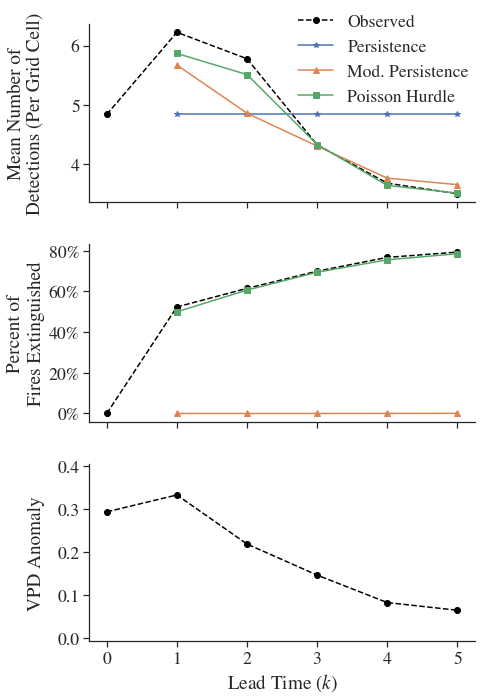

In [86]:
set_font((FIG_REG_WIDTH,FIG_REG_WIDTH/FIG_REG_ASPECT_RATIO*2.5))

legend_func = lambda : plt.legend(loc='upper right', bbox_to_anchor=(1.025,1.15))


data_dict,observed = build_forecast_dict(df, d.keys())
display_simulation(data_dict,observed, data=df, covars=covars, covar_means=covar_means,
                   markers=['*', '^', 's', 'o', 'x', 'd', 'v', 'p', 'P', '1'],
                   label_pad = [100,90,90,110], legend_func=legend_func)

sb.despine()

if SAVE_FIGS:
    plt.savefig(os.path.join(FIGURES_DIR, 'first_day_fire_pred.pdf'))

In [ ]:
pred_dict_poisson_sep = {k: poisson_vpd_ar_separated_ac1['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

In [107]:
pred_dict_poisson_joint = {k: poisson_vpd_ar_joint_ac2['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

In [56]:
ar = [mlp_16_8_vpd_ar, mlp_16_8_vpd_ar_mem_2, mlp_16_8_all_mem_temp_humid_1,  hurdle_poisson_vpd_ar_active,  ]#hurdle_poisson_vpd_ar_mem_vpd_1_separated_ac2, hurdle_poisson_vpd_ar_mem_ar_1_separated_ac2]

names = ['MLP', 'MLP (all weather covariates)', 'MLP (with lag 2 memory)', 'Hurdle Poisson', ]#'Two-Poisson Hurdle MEM VPD', 'Two-Poisson Hurdle MEM AR']
table = []
mse_persistence =  persistence['summary_results']['test']['root_mean_squared_error_active'][1][0]
for n,v2 in zip(names,ar):
    mse = v2['summary_results']['test']['root_mean_squared_error_active'][1][0]
    mse_ss = '{:.2f}%'.format(np.array((mse_persistence-mse)/mse_persistence)*100)
    table.append((n,mse, mse_ss))
    
table = tabulate(table,tablefmt='latex', floatfmt='.1f')
print(table)

\begin{tabular}{lrl}
\hline
 MLP                          & 19.3 & 29.57\% \\
 MLP (all weather covariates) & 19.5 & 29.06\% \\
 MLP (with lag 2 memory)      & 19.6 & 28.59\% \\
 Hurdle Poisson               & 19.0 & 30.69\% \\
\hline
\end{tabular}


In [52]:
ar = [persistence, persistence_aug, poisson_all_weather_ar_joint_ac1, poisson_vpd_ar_separated_ac1, hurdle_poisson_vpd_ar_joint_ac1, 
      hurdle_poisson_vpd_ar_separated_ac1]#hurdle_poisson_vpd_ar_mem_vpd_1_separated_ac2, hurdle_poisson_vpd_ar_mem_ar_1_separated_ac2]

names = ['Persistence', 'Modulated Persistence', 'Single-Poisson', 'Two-Poisson', 'Single-Poisson Hurdle', 'Two-Poisson Hurdle']#'Two-Poisson Hurdle MEM VPD', 'Two-Poisson Hurdle MEM AR']
table = []
mse_persistence =  persistence['summary_results']['test']['root_mean_squared_error'][1][0]
for n,v2 in zip(names,ar):
    mse = v2['summary_results']['test']['root_mean_squared_error'][1][0]
    mse_ss = '{:.2f}%'.format(np.array((mse_persistence-mse)/mse_persistence)*100)
    table.append((n,mse, mse_ss))
    
table = tabulate(table,tablefmt='latex', floatfmt='.2f')
print(table)

NameError: name 'poisson_all_weather_ar_joint_ac1' is not defined

In [87]:
ar = [persistence, persistence_aug, poisson_all_weather_ar_joint_ac1, poisson_vpd_ar_separated_ac1, hurdle_poisson_vpd_ar_joint_ac1, 
      hurdle_poisson_vpd_ar_separated_ac1]#hurdle_poisson_vpd_ar_mem_vpd_1_separated_ac2, hurdle_poisson_vpd_ar_mem_ar_1_separated_ac2]

names = ['Persistence', 'Modulated Persistence', 'Single-Poisson', 'Two-Poisson', 'Single-Poisson Hurdle', 'Two-Poisson Hurdle']#'Two-Poisson Hurdle MEM VPD', 'Two-Poisson Hurdle MEM AR']
table = []
mse_persistence =  persistence['summary_results']['test']['root_mean_squared_error'][1][0]
for n,v2 in zip(names,ar):
    mse = v2['summary_results']['test']['root_mean_squared_error'][1][0]
    mse_ss = '{:.2f}%'.format(np.array((mse_persistence-mse)/mse_persistence)*100)
    table.append((n,mse, mse_ss))
    
table = tabulate(table,tablefmt='latex', floatfmt='.2f')
print(table)

NameError: name 'poisson_all_weather_ar_joint_ac1' is not defined

In [ ]:
plt.rcParams['figure.figsize'] = [15,4]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

fire = X_grid_dict_nw[1][0].num_det.values

YEARS = list(range(2007, 2017))

poisson_all = []
aug_persist_all = []
persist_all = []

for YEAR in YEARS:
    print('YEAR=%d' % YEAR)
    T_K = 1

    OFF1 = 0
    OFF2 = -1

    start_ind = 110*(YEAR-2007)
    end_ind = 110*(1+(YEAR-2007))

    fire_year = fire[:,:,start_ind:end_ind]

    persistence_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),fire_year[:,:,:-T_K]], axis=2))

    pred_year = pred_dict_hurdle_active[T_K][:,:,start_ind:end_ind]
    shifted_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year[:,:,:-(T_K)]], axis=2))

    pred_year2 = pred_dict_aug[T_K][:,:,start_ind:end_ind]
    shifted_pred2 = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year2[:,:,:-(T_K)]], axis=2))

    fire_days = np.sum(fire_year, axis=(0,1))
    persistence_days = np.sum(persistence_pred, axis=(0,1))
    pred_days = np.sum(shifted_pred, axis=(0,1))
    pred_days2 = np.sum(shifted_pred2, axis=(0,1))


    #plt.plot(fire_days[OFF1:OFF2], color='black', linewidth=2.0, label='Observed')
    #plt.plot(pred_days[OFF1:OFF2], label='Poisson')
    #plt.plot(pred_days2[OFF1:OFF2], label='Aug. Persistence')


    months, days = X_grid_dict_nw[1][0].time.dt.month, X_grid_dict_nw[1][0].time.dt.day
    date_strings = ['%d/%02d' % (month,day) for (month,day) in zip(months,days)]
    #_ = plt.xticks(ticks_pos, date_strings[::20])
    #plt.setp(ax.get_xticklabels(), visible=False)

    #ticks_pos = np.arange(0,len(diff1[OFF1:OFF2]),5)
    #_ = plt.xticks(ticks_pos)
    #_ = plt.xticks(ticks_pos, date_strings[OFF1:OFF2:5])

    #plt.xlabel('Day of Fire Season')
    #plt.ylabel('# of Detections')
    #plt.legend()
    ##plt.title('Region-level Predictions (%d)' % YEAR)


    #ax = fig.add_subplot(3,1,2)


    diff1 = ((fire_days - pred_days)**2)[persistence_days>0]
    diff2 = ((fire_days - pred_days2)**2)[persistence_days>0]
    diff_persistence = ((fire_days - persistence_days)**2)[persistence_days>0]

    #plt.plot(np.sqrt(diff1[OFF1:OFF2]), label='Poisson (+%d)' % T_K)
    #plt.plot(np.sqrt(diff2[OFF1:OFF2]), label='Persistence Aug (+%d)' % (T_K))

    #plt.setp(ax.get_xticklabels(), visible=False)



    #plt.ylabel('RMSE')

    #ax = fig.add_subplot(3,1,3)

    diff1_ = (pred_days - fire_days)
    diff2_ = (pred_days2 - fire_days)

    #plt.plot(diff1_[OFF1:OFF2], label='Poisson (+%d)' % T_K)
    #plt.plot(diff2_[OFF1:OFF2], label='Persistence Aug (+%d)' % (T_K))

    #plt.axhline(linewidth=1, linestyle='--', color='black')



    #plt.ylabel('Difference')
    #plt.xlabel('Day of Fire Season')

    #plt.legend()


    
    pois = (np.mean(diff1[OFF1:OFF2])/(33*55))
    aug_pers = (np.mean(diff2[OFF1:OFF2])/(33*55))
    pers = (np.mean(diff_persistence[OFF1:OFF2])/(33*55))
    
    poisson_all.append(pois)
    aug_persist_all.append(aug_pers)
    persist_all.append(pers)
    
    print('Poisson (+%d) MSE: %f' % (T_K, pois))
    print('Aug Persistence (+%d) MSE: %f' % ((T_K), aug_pers))
    print('Persistence (+%d) MSE: %f' % ((T_K), pers))


    mse_1 = np.mean((fire_year - shifted_pred)**2)
    mse_2 = np.mean((fire_year - shifted_pred2)**2)
    #print('Poisson (+%d) RMSE: %f' % (T_K, np.sqrt(mse_1)))
    #print('Persistence (+%d) RMSE: %f' % ((T_K), np.sqrt(mse_2)))
    """
    pred = results_joint_poisson_ar_w_models[T_K][1].model.predict(X_grid_dict_nw[T_K+1])
    pred = np.reshape(np.array(pred), (33,55,-1))
    pred = np.sum(pred, axis=(0,1))
    start_ind = 0+110*(YEAR-2007)
    end_ind = 110*(1+(YEAR-2007))
    plt.plot(np.array(np.concatenate([[0]*(T_K+1),pred[start_ind:end_ind-(T_K+1)]])), label='Poisson (+%d)' % (T_K+1))

    diff2 = fire_days[start_ind:end_ind] - np.array(np.concatenate([[0]*(T_K+1),pred[start_ind:end_ind-(T_K+1)]]))


    pred = results_joint_poisson_ar_w_models[T_K+1][1].model.predict(X_grid_dict_nw[T_K+2])
    pred = np.reshape(np.array(pred), (33,55,-1))
    pred = np.sum(pred, axis=(0,1))
    start_ind = 0+110*(YEAR-2007)
    end_ind = 110*(1+(YEAR-2007))
    #plt.plot(np.array(np.concatenate([[0]*(T_K+2),pred[start_ind:end_ind-(T_K+2)]])), label='Poisson (+%d)' % (T_K+2))

    diff3 = fire_days[start_ind:end_ind] - np.array(np.concatenate([[0]*(T_K+2),pred[start_ind:end_ind-(T_K+2)]]))

    plt.xlabel('Day of Fire Season')
    plt.ylabel('# of Detections')
    plt.legend()
    plt.title('Detections in %d'% YEAR)

    #plt.plot(np.array(np.concatenate([[0]*T_K,fire_days[start_ind:end_ind-T_K]])), label='Persistence (+%d)' % T_K)

    ax = fig.add_subplot(2,1,2)

    plt.plot(diff1, label='Poisson (+%d) - Diff' % (T_K))
    plt.plot(diff2, label='Poisson (+%d) - Diff' % (T_K+1))
    #plt.plot(diff3, label='Poisson (+%d) - Diff' % (T_K+2))



    plt.ylabel('$\Delta$ # of Detections')
    plt.legend()
    plt.title('Differences of Detections in %d'% YEAR)



    """

    plt.xlabel('Day of Fire Season')


    fig.tight_layout()
    
print('Poisson Mean MSE: %f' % np.mean(poisson_all))
print('Aug Pers Mean MSE: %f' % np.mean(aug_persist_all))
print('Pers Mean MSE: %f' % np.mean(persist_all))

print('Poisson STD MSE: %f' % np.std(poisson_all))
print('Aug Pers STD MSE: %f' % np.std(aug_persist_all))
print('Pers Mean STD: %f' % np.std(persist_all))

persist_all = np.round(persist_all + [np.mean(persist_all),np.std(persist_all)], 2)
aug_persist_all = np.round(aug_persist_all + [np.mean(aug_persist_all),np.std(aug_persist_all)], 2)
poisson_all = np.round(poisson_all + [np.mean(poisson_all),np.std(poisson_all)], 2)

print(tabulate(zip(YEARS+['Mean', 'Std. Dev'], persist_all,
                   #aug_persist_all,
                   poisson_all), tablefmt='latex_raw'))

In [450]:
hurdle_poisson_vpd_ar_separated_ac1

{'models': [[<src.models.grid_models.ActiveIgnitionGrid at 0x7fe45993d438>,
 'summary_results': defaultdict(dict,
             {'train': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
                [1.6575984111438586,
                 1.4934040719468686,
                 1.6220274948103708,
                 1.6973873146617255,
                 1.7245890365301806,
                 1.750584137770149]),
               'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5],
                [0.097491975386349045,
                 0.074119500715946585,
                 0.09207408276016682,
                 0.10260905709722137,
                 0.10747404022025298,
                 0.11118319613815744])},
              'test': {'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
                [1.6785109112958101,
                 1.4997171107281471,
                 1.6390898734579884,
                 1.7263878182088084,
                 1.7487491477482251,
                 1.778610606

In [113]:
#pred_dict_hurdle_poisson_vpd_ar_separated = {k: hurdle_poisson_vpd_ar_mem_ar_1_active['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}
pred_dict_hurdle_poisson_vpd_ar_separated = {k: hurdle_poisson_vpd_ar_vpd_ign_log_vpd_add_separated_insample['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}


Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log


In [18]:
pred_dict_aug = {k: persistence_aug['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

-1.0 1.0 0.09847993319705049
-1.0 1.0 0.10510787221579548
-1.0 1.0 0.10371262118624489
-1.0 1.0 0.10075202273388338
-1.0 1.0 0.10002896272120125


Poisson (+1) MSE: 833818.681946
Persistence (+1) MSE: 1124817.789007
Poisson (+1) RMSE: 2.386541
Persistence (+1) RMSE: 3.213893


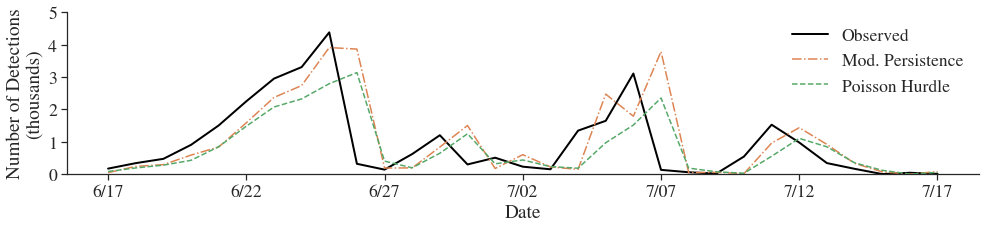

In [114]:
set_font((FIG_REG_WIDTH*2,FIG_REG_WIDTH/FIG_REG_ASPECT_RATIO*.85))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

fire = X_grid_dict_nw[1][0].num_det.values

YEAR = 2015
T_K = 1

OFF1 = 34
OFF2 = -45

start_ind = 110*(YEAR-2007)
end_ind = 110*(1+(YEAR-2007))

fire_year = fire[:,:,start_ind:end_ind]

persistence_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),fire_year[:,:,:-T_K]], axis=2))

pred_year = pred_dict_hurdle_poisson_vpd_ar_separated[T_K][:,:,start_ind:end_ind]
shifted_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year[:,:,:-(T_K)]], axis=2))

pred_year2 = pred_dict_aug[T_K][:,:,start_ind:end_ind]
shifted_pred2 = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year2[:,:,:-(T_K)]], axis=2))

fire_days = np.sum(fire_year, axis=(0,1))
persistence_days = np.sum(persistence_pred, axis=(0,1))
pred_days = np.sum(shifted_pred, axis=(0,1))
pred_days2 = np.sum(shifted_pred2, axis=(0,1))


plt.plot(fire_days[OFF1:OFF2], color='black', linewidth=2.0, label='Observed')
plt.plot(pred_days2[OFF1:OFF2], '-.', label='Mod. Persistence', color=sb.color_palette()[1])
plt.plot(pred_days[OFF1:OFF2], '--', label='Poisson Hurdle', color=sb.color_palette()[2])


months, days = X_grid_dict_nw[1][0].time.dt.month, X_grid_dict_nw[1][0].time.dt.day
date_strings = ['%d/%02d' % (month,day) for (month,day) in zip(months,days)]
#_ = plt.xticks(ticks_pos, date_strings[::20])
#plt.setp(ax.get_xticklabels(), visible=False)


#plt.xlabel('Day of Fire Season')
plt.ylabel('Number of Detections\n(thousands)')
plt.legend()
plt.ylim(0)
plt.yticks(ax.get_yticks(), np.array(ax.get_yticks()).astype(int)//1000)
#plt.title('Region-level Predictions (%d)' % YEAR)


#ax = fig.add_subplot(3,1,2)


diff1 = (fire_days - pred_days)**2
diff2 = (fire_days - pred_days2)**2

ticks_pos = np.arange(0,len(diff1[OFF1:OFF2]),5)
#_ = plt.xticks(ticks_pos)
_ = plt.xticks(ticks_pos, date_strings[OFF1:OFF2:5])



#plt.plot(np.sqrt(diff1[OFF1:OFF2]), label='Poisson (+%d)' % T_K)
#plt.plot(np.sqrt(diff2[OFF1:OFF2]), label='Persistence Aug (+%d)' % (T_K))

#plt.setp(ax.get_xticklabels(), visible=False)



#plt.ylabel('RMSE')

#ax = fig.add_subplot(3,1,3)

diff1_ = (pred_days - fire_days)
diff2_ = (pred_days2 - fire_days)

#plt.plot(diff1_[OFF1:OFF2], label='Poisson (+%d)' % T_K)
#plt.plot(diff2_[OFF1:OFF2], label='Persistence Aug (+%d)' % (T_K))

#plt.axhline(linewidth=1, linestyle='--', color='black')



#plt.ylabel('Difference')
plt.xlabel('Date')

#plt.legend()

print('Poisson (+%d) MSE: %f' % (T_K, (np.mean(diff1[OFF1:OFF2]))))
print('Persistence (+%d) MSE: %f' % ((T_K), (np.mean(diff2[OFF1:OFF2]))))

mse_1 = np.mean((fire_year - shifted_pred)**2)
mse_2 = np.mean((fire_year - shifted_pred2)**2)
print('Poisson (+%d) RMSE: %f' % (T_K, np.sqrt(mse_1)))
print('Persistence (+%d) RMSE: %f' % ((T_K), np.sqrt(mse_2)))


plt.xlabel('Date')


fig.tight_layout()

sb.despine()

if SAVE_FIGS:
    plt.savefig(os.path.join(FIGURES_DIR, 'region_level_forecast_2015_k1.pdf'))

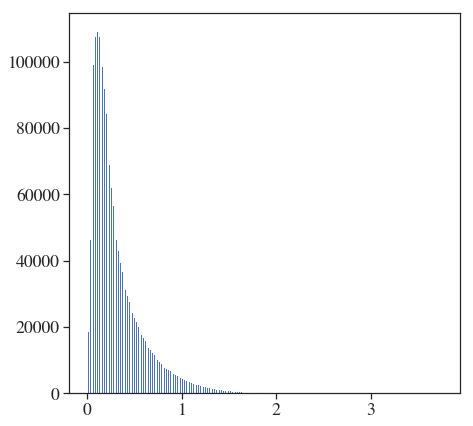

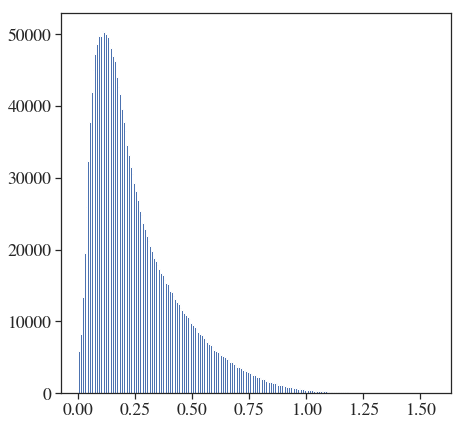

In [91]:
vpd = X_grid_dict_nw[1][0].vpd.values.flatten()
_ = plt.hist(vpd, bins=200)
plt.show()
_ = plt.hist(np.log(vpd+ 1), bins=200)
#_ = plt.hist(np.exp(vpd), bins=100)

In [15]:
YEARS = list(range(2007, 2017))

pred_dict_hurdle_poisson_vpd_ar_separated_by_year = {    
    year: {
        k: hurdle_poisson_vpd_ar_vpd_ign_log_vpd_add_separated['models'][k-1][year_ind].predict(X_grid_dict_nw[k], shape=(33,55,1100))
        for k in [1,2,3,4,5]}
    for year_ind, year in enumerate(YEARS)
}


Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log

In [19]:
#plt.rcParams['figure.figsize'] = [15,4]

#font = {'family' : 'DejaVu Sans',
#        'weight' : 'normal',
#        'size'   : 20}

#plt.rc('font', **font)

#fig = plt.figure()
#ax = fig.add_subplot(1,1,1)

fire = X_grid_dict_nw[1][0].num_det.values

YEARS = list(range(2007, 2017))



for T_K in [1,5]:
    print(f'T_K={T_K}')
    
    poisson_all = []
    aug_persist_all = []
    persist_all = []
    
    for YEAR in YEARS:
        print('YEAR=%d' % YEAR, end=' ')


        

        OFF1 = 0
        OFF2 = -1

        start_ind = 110*(YEAR-2007)
        end_ind = 110*(1+(YEAR-2007))
        
        filter_mask = X_grid_dict_nw[1][0].filter_mask.values[:,:,start_ind:end_ind]

        fire_year = fire[:,:,start_ind:end_ind]

        persistence_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),fire_year[:,:,:-T_K]], axis=2))


        pred_year = pred_dict_hurdle_poisson_vpd_ar_separated_by_year[YEAR][T_K][:,:,start_ind:end_ind]
        
        #pred_year = test_model_by_year[2007][T_K][:,:,start_ind:end_ind]
        
        

        shifted_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year[:,:,:-(T_K)]], axis=2))

        pred_year2 = pred_dict_aug[T_K][:,:,start_ind:end_ind]
        shifted_pred2 = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year2[:,:,:-(T_K)]], axis=2))

        fire_days = np.sum(fire_year[filter_mask].reshape((-1,110)), axis=(0))
        persistence_days = np.sum(persistence_pred[filter_mask].reshape((-1,110)), axis=(0))
        pred_days = np.sum(shifted_pred[filter_mask].reshape((-1,110)), axis=(0))
        pred_days2 = np.sum(shifted_pred2[filter_mask].reshape((-1,110)), axis=(0))

        #if YEAR == 2013:
            #plt.plot(fire_days[OFF1:OFF2], color='black', linewidth=2.0, label='Observed')
            #plt.plot(pred_days[OFF1:OFF2], label='Poisson Hurdle')
            
            #plt.plot(X_grid_dict_nw[k]
            
            #print(pred_days[OFF1:OFF2])
            #plt.plot(pred_days2[OFF1:OFF2], label='Aug. Persistence')
            
            #plt.xlabel('Day of Fire Season')
            #plt.ylabel('# of Detections')
            #plt.legend()


        months, days = X_grid_dict_nw[1][0].time.dt.month, X_grid_dict_nw[1][0].time.dt.day
        date_strings = ['%d/%02d' % (month,day) for (month,day) in zip(months,days)]
        #_ = plt.xticks(ticks_pos, date_strings[::20])
        #plt.setp(ax.get_xticklabels(), visible=False)

        #ticks_pos = np.arange(0,len(diff1[OFF1:OFF2]),5)
        #_ = plt.xticks(ticks_pos)
        #_ = plt.xticks(ticks_pos, date_strings[OFF1:OFF2:5])

        
        ##plt.title('Region-level Predictions (%d)' % YEAR)


        #ax = fig.add_subplot(3,1,2)


        diff1 = ((fire_days - pred_days)**2)#[persistence_days>0]
        diff2 = ((fire_days - pred_days2)**2)#[persistence_days>0]
        diff_persistence = ((fire_days - persistence_days)**2)#[persistence_days>0]

        #plt.plot(np.sqrt(diff1[OFF1:OFF2]), label='Poisson (+%d)' % T_K)
        #plt.plot(np.sqrt(diff2[OFF1:OFF2]), label='Persistence Aug (+%d)' % (T_K))

        #plt.setp(ax.get_xticklabels(), visible=False)



        #plt.ylabel('RMSE')

        #ax = fig.add_subplot(3,1,3)

        diff1_ = (pred_days - fire_days)
        diff2_ = (pred_days2 - fire_days)

        #plt.plot(diff1_[OFF1:OFF2], label='Poisson (+%d)' % T_K)
        #plt.plot(diff2_[OFF1:OFF2], label='Persistence Aug (+%d)' % (T_K))

        #plt.axhline(linewidth=1, linestyle='--', color='black')



        #plt.ylabel('Difference')
        #plt.xlabel('Day of Fire Season')

        #plt.legend()



        pois = np.sqrt(np.mean(diff1[OFF1:OFF2])/(33*55))
        aug_pers = np.sqrt(np.mean(diff2[OFF1:OFF2])/(33*55))
        pers = np.sqrt(np.mean(diff_persistence[OFF1:OFF2])/(33*55))

        poisson_all.append(pois)
        aug_persist_all.append(aug_pers)
        persist_all.append(pers)

        #print('Poisson (+%d) MSE: %f' % (T_K, pois))
        #print('Aug Persistence (+%d) MSE: %f' % ((T_K), aug_pers))
        #print('Persistence (+%d) MSE: %f' % ((T_K), pers))


        mse_1 = np.mean((fire_year - shifted_pred)**2)
        mse_2 = np.mean((fire_year - shifted_pred2)**2)

        #plt.xlabel('Day of Fire Season')


        #fig.tight_layout()

    print()

    print('Poisson Mean MSE: %f' % np.mean(poisson_all))
    print('Aug Pers Mean MSE: %f' % np.mean(aug_persist_all))
    print('Pers Mean MSE: %f' % np.mean(persist_all))

    print('Poisson STD MSE: %f' % np.std(poisson_all))
    print('Aug Pers STD MSE: %f' % np.std(aug_persist_all))
    print('Pers Mean STD: %f' % np.std(persist_all))

    persist_all = np.round(persist_all + [np.mean(persist_all),np.std(persist_all)], 2)
    aug_persist_all = np.round(aug_persist_all + [np.mean(aug_persist_all),np.std(aug_persist_all)], 2)
    poisson_all = np.round(poisson_all + [np.mean(poisson_all),np.std(poisson_all)], 2)

    print(tabulate(zip(YEARS+['Mean', 'Std. Dev'], persist_all,
                       aug_persist_all,
                       poisson_all), tablefmt='latex_raw', floatfmt='.2f'))

T_K=1
YEAR=2007 YEAR=2008 YEAR=2009 YEAR=2010 YEAR=2011 YEAR=2012 YEAR=2013 YEAR=2014 YEAR=2015 YEAR=2016 
Poisson Mean MSE: 2.894832
Aug Pers Mean MSE: 3.513779
Pers Mean MSE: 3.408012
Poisson STD MSE: 3.583009
Aug Pers STD MSE: 4.467580
Pers Mean STD: 4.191402
\begin{tabular}{lrrr}
\hline
 2007     &  1.26 &  1.10 &  0.99 \\
 2008     &  0.37 &  0.33 &  0.30 \\
 2009     &  9.12 & 10.78 &  7.92 \\
 2010     &  1.80 &  1.89 &  1.60 \\
 2011     &  0.79 &  0.82 &  0.76 \\
 2012     &  0.50 &  0.52 &  0.42 \\
 2013     &  2.51 &  2.32 &  2.00 \\
 2014     &  0.59 &  0.53 &  0.56 \\
 2015     & 13.53 & 13.60 & 11.50 \\
 2016     &  3.61 &  3.26 &  2.89 \\
 Mean     &  3.41 &  3.51 &  2.89 \\
 Std. Dev &  4.19 &  4.47 &  3.58 \\
\hline
\end{tabular}
T_K=5
YEAR=2007 YEAR=2008 YEAR=2009 YEAR=2010 YEAR=2011 YEAR=2012 YEAR=2013 YEAR=2014 YEAR=2015 YEAR=2016 
Poisson Mean MSE: 3.963039
Aug Pers Mean MSE: 4.179851
Pers Mean MSE: 5.054643
Poisson STD MSE: 5.006863
Aug Pers STD MSE: 5.362469
Pers

T_K=5
YEAR=2013 [   48.84616626    17.11669856    14.67929922    62.08356229    55.42903479
    54.91502332    58.34100892    28.74953812    27.22854752    94.85213285
   277.23103615   348.42317316   299.00620536   256.99350652   601.46483885
  1220.97579404  1917.30729059   656.97469785   380.68544565    79.15178994
   245.33503393   340.12500932   448.99814074   339.42296695   287.23341227
   267.65823899   213.16839523   378.46401711   329.56004911   198.7228469
   103.10878531   134.68880007    72.79382857   124.24169554   139.38308849
    61.04570992    22.17630958    16.99873534    64.42482014   144.26948735]

Poisson Mean MSE: 7.323679
Aug Pers Mean MSE: 5.272054
Pers Mean MSE: 6.449428
Poisson STD MSE: 0.000000
Aug Pers STD MSE: 0.000000
Pers Mean STD: 0.000000
\begin{tabular}{rrrr}
\hline
 2007 & 6.45 & 5.27 & 7.32 \\
 2008 & 6.45 & 5.27 & 7.32 \\
 2009 & 0.00 & 0.00 & 0.00 \\
\hline
\end{tabular}


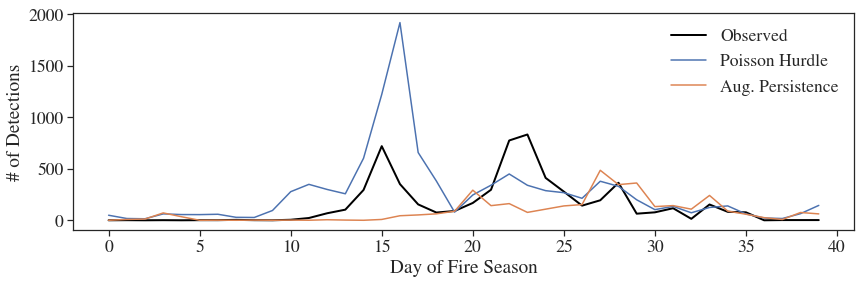

In [92]:
#plt.rcParams['figure.figsize'] = [15,4]

#font = {'family' : 'DejaVu Sans',
#        'weight' : 'normal',
#        'size'   : 20}

#plt.rc('font', **font)
set_font((FIG_REG_WIDTH*2,FIG_REG_WIDTH/FIG_REG_ASPECT_RATIO))

fig = plt.figure()

fire = X_grid_dict_nw[1][0].num_det.values

YEARS = list(range(2007, 2017))



for T_K in [5]:
    print(f'T_K={T_K}')
    
    poisson_all = []
    aug_persist_all = []
    persist_all = []
    
    for YEAR in [2013]:
        print('YEAR=%d' % YEAR, end=' ')


        

        OFF1 = 20
        OFF2 = -50

        start_ind = 110*(YEAR-2007)
        end_ind = 110*(1+(YEAR-2007))
        
        filter_mask = X_grid_dict_nw[1][0].filter_mask.values[:,:,start_ind:end_ind]

        fire_year = fire[:,:,start_ind:end_ind]

        persistence_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),fire_year[:,:,:-T_K]], axis=2))


        #pred_year = pred_dict_hurdle_poisson_vpd_ar_separated_by_year[2007][T_K][:,:,start_ind:end_ind]
        pred_year = test_model_by_year[2007][T_K][:,:,start_ind:end_ind]

        shifted_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year[:,:,:-(T_K)]], axis=2))

        pred_year2 = pred_dict_aug[T_K][:,:,start_ind:end_ind]
        shifted_pred2 = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year2[:,:,:-(T_K)]], axis=2))

        fire_days = np.sum(fire_year[filter_mask].reshape((-1,110)), axis=(0))
        persistence_days = np.sum(persistence_pred[filter_mask].reshape((-1,110)), axis=(0))
        pred_days = np.sum(shifted_pred[filter_mask].reshape((-1,110)), axis=(0))
        pred_days2 = np.sum(shifted_pred2[filter_mask].reshape((-1,110)), axis=(0))

        if YEAR == 2013:
            plt.plot(fire_days[OFF1:OFF2], color='black', linewidth=2.0, label='Observed')
            plt.plot(pred_days[OFF1:OFF2], label='Poisson Hurdle')
            
            # plt.plot(np.mean(X_grid_dict_nw[T_K][0].vpd.values[:, :, start_ind:end_ind], axis=(0,1))[OFF1:OFF2])
            
            print(pred_days[OFF1:OFF2])
            plt.plot(pred_days2[OFF1:OFF2], label='Aug. Persistence')
            
            plt.xlabel('Day of Fire Season')
            plt.ylabel('# of Detections')
            plt.legend()


        months, days = X_grid_dict_nw[1][0].time.dt.month, X_grid_dict_nw[1][0].time.dt.day
        date_strings = ['%d/%02d' % (month,day) for (month,day) in zip(months,days)]
        #_ = plt.xticks(ticks_pos, date_strings[::20])
        #plt.setp(ax.get_xticklabels(), visible=False)

        #ticks_pos = np.arange(0,len(diff1[OFF1:OFF2]),5)
        #_ = plt.xticks(ticks_pos)
        #_ = plt.xticks(ticks_pos, date_strings[OFF1:OFF2:5])

        
        ##plt.title('Region-level Predictions (%d)' % YEAR)


        #ax = fig.add_subplot(3,1,2)


        diff1 = ((fire_days - pred_days)**2)#[persistence_days>0]
        diff2 = ((fire_days - pred_days2)**2)#[persistence_days>0]
        diff_persistence = ((fire_days - persistence_days)**2)#[persistence_days>0]

        #plt.plot(np.sqrt(diff1[OFF1:OFF2]), label='Poisson (+%d)' % T_K)
        #plt.plot(np.sqrt(diff2[OFF1:OFF2]), label='Persistence Aug (+%d)' % (T_K))

        #plt.setp(ax.get_xticklabels(), visible=False)



        #plt.ylabel('RMSE')

        #ax = fig.add_subplot(3,1,3)

        diff1_ = (pred_days - fire_days)
        diff2_ = (pred_days2 - fire_days)

        #plt.plot(diff1_[OFF1:OFF2], label='Poisson (+%d)' % T_K)
        #plt.plot(diff2_[OFF1:OFF2], label='Persistence Aug (+%d)' % (T_K))

        #plt.axhline(linewidth=1, linestyle='--', color='black')



        #plt.ylabel('Difference')
        #plt.xlabel('Day of Fire Season')

        #plt.legend()



        pois = np.sqrt(np.mean(diff1[OFF1:OFF2])/(33*55))
        aug_pers = np.sqrt(np.mean(diff2[OFF1:OFF2])/(33*55))
        pers = np.sqrt(np.mean(diff_persistence[OFF1:OFF2])/(33*55))

        poisson_all.append(pois)
        aug_persist_all.append(aug_pers)
        persist_all.append(pers)

        #print('Poisson (+%d) MSE: %f' % (T_K, pois))
        #print('Aug Persistence (+%d) MSE: %f' % ((T_K), aug_pers))
        #print('Persistence (+%d) MSE: %f' % ((T_K), pers))


        mse_1 = np.mean((fire_year - shifted_pred)**2)
        mse_2 = np.mean((fire_year - shifted_pred2)**2)

        plt.xlabel('Day of Fire Season')


        #fig.tight_layout()

    print()

    print('Poisson Mean MSE: %f' % np.mean(poisson_all))
    print('Aug Pers Mean MSE: %f' % np.mean(aug_persist_all))
    print('Pers Mean MSE: %f' % np.mean(persist_all))

    print('Poisson STD MSE: %f' % np.std(poisson_all))
    print('Aug Pers STD MSE: %f' % np.std(aug_persist_all))
    print('Pers Mean STD: %f' % np.std(persist_all))

    persist_all = np.round(persist_all + [np.mean(persist_all),np.std(persist_all)], 2)
    aug_persist_all = np.round(aug_persist_all + [np.mean(aug_persist_all),np.std(aug_persist_all)], 2)
    poisson_all = np.round(poisson_all + [np.mean(poisson_all),np.std(poisson_all)], 2)

    print(tabulate(zip(YEARS+['Mean', 'Std. Dev'], persist_all,
                       aug_persist_all,
                       poisson_all), tablefmt='latex_raw', floatfmt='.2f'))

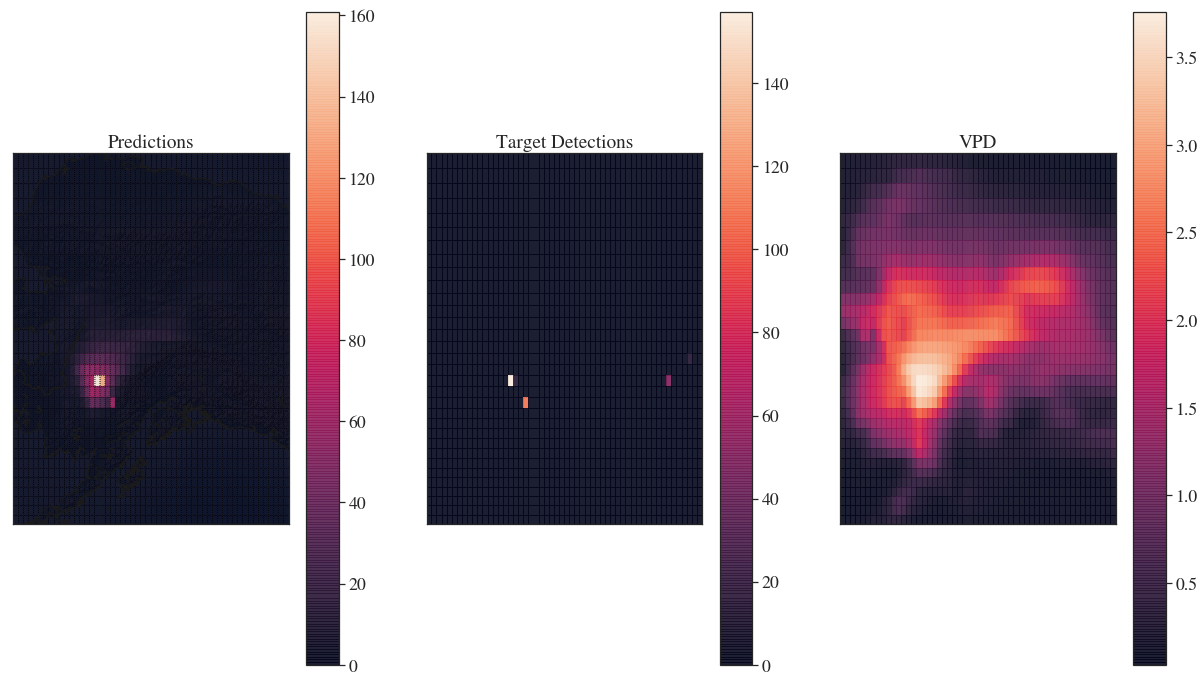

In [236]:
set_font((FIG_REG_WIDTH*3,FIG_REG_WIDTH/FIG_REG_ASPECT_RATIO*3))

fig = plt.figure()

DAY = 31
# Plot topography
ax = fig.add_subplot(131)
plt.title('Predictions')

day = pred_dict_hurdle_poisson_vpd_ar_separated_by_year[2007][5][:,:,start_ind:end_ind][:,:,DAY]

mp = vmap.make_map(weather_proc_region.bounding_box, (0, .5, 0, .5))
mp.shadedrelief()

values = day
lats, lons = weather_proc_region.bounding_box.make_grid(inclusive_lon=True)

cs = mp.pcolormesh(lons, lats , values, latlon=True, alpha=.9)
plt.colorbar()

ax = fig.add_subplot(132)
plt.title('Target Detections')

values = X_grid_dict_nw[T_K][0].num_det_target.values[:,:,start_ind:end_ind][:, :, DAY]
#lats, lons = weather_proc_region.bounding_box.make_grid(inclusive_lon=True)

cs = mp.pcolormesh(lons, lats , values, latlon=True, alpha=.9)
plt.colorbar()

ax = fig.add_subplot(133)
plt.title('VPD')

values = X_grid_dict_nw[T_K][0].vpd.values[:,:,start_ind:end_ind][:, :, DAY]
#lats, lons = weather_proc_region.bounding_box.make_grid(inclusive_lon=True)

cs = mp.pcolormesh(lons, lats , values, latlon=True, alpha=.9)
plt.colorbar()

T_K=1
YEAR=2007 YEAR=2008 YEAR=2009 YEAR=2010 YEAR=2011 YEAR=2012 YEAR=2013 YEAR=2014 YEAR=2015 YEAR=2016 
Poisson Mean MSE: 2.918573
Aug Pers Mean MSE: 3.513779
Pers Mean MSE: 3.408012
Poisson STD MSE: 3.506907
Aug Pers STD MSE: 4.467580
Pers Mean STD: 4.191402
\begin{tabular}{lrrr}
\hline
 2007     &  1.26 &  1.10 &  0.97 \\
 2008     &  0.37 &  0.33 &  0.41 \\
 2009     &  9.12 & 10.78 &  7.75 \\
 2010     &  1.80 &  1.89 &  1.63 \\
 2011     &  0.79 &  0.82 &  0.82 \\
 2012     &  0.50 &  0.52 &  0.51 \\
 2013     &  2.51 &  2.32 &  2.22 \\
 2014     &  0.59 &  0.53 &  0.61 \\
 2015     & 13.53 & 13.60 & 11.40 \\
 2016     &  3.61 &  3.26 &  2.86 \\
 Mean     &  3.41 &  3.51 &  2.92 \\
 Std. Dev &  4.19 &  4.47 &  3.51 \\
\hline
\end{tabular}
T_K=5
YEAR=2007 YEAR=2008 YEAR=2009 YEAR=2010 YEAR=2011 YEAR=2012 YEAR=2013 YEAR=2014 YEAR=2015 YEAR=2016 
Poisson Mean MSE: 4.416116
Aug Pers Mean MSE: 4.179851
Pers Mean MSE: 5.054643
Poisson STD MSE: 4.730277
Aug Pers STD MSE: 5.362469
Pers

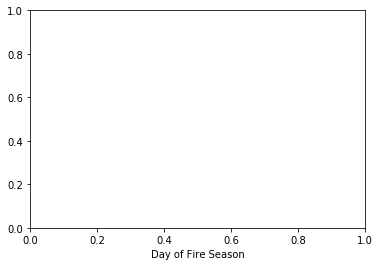

In [23]:
#plt.rcParams['figure.figsize'] = [15,4]

#font = {'family' : 'DejaVu Sans',
#        'weight' : 'normal',
#        'size'   : 20}

#plt.rc('font', **font)

#fig = plt.figure()
#ax = fig.add_subplot(1,1,1)

fire = X_grid_dict_nw[1][0].num_det.values

YEARS = list(range(2007, 2017))



for T_K in [1,5]:
    print(f'T_K={T_K}')
    
    poisson_all = []
    aug_persist_all = []
    persist_all = []
    
    for YEAR in YEARS:
        print('YEAR=%d' % YEAR, end=' ')


        

        OFF1 = 0
        OFF2 = -1

        start_ind = 110*(YEAR-2007)
        end_ind = 110*(1+(YEAR-2007))
        
        filter_mask = X_grid_dict_nw[1][0].filter_mask.values[:,:,start_ind:end_ind]

        fire_year = fire[:,:,start_ind:end_ind]

        persistence_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),fire_year[:,:,:-T_K]], axis=2))


        pred_year = pred_dict_hurdle_poisson_vpd_ar_separated_by_year_old[2007][T_K][:,:,start_ind:end_ind]

        shifted_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year[:,:,:-(T_K)]], axis=2))

        pred_year2 = pred_dict_aug[T_K][:,:,start_ind:end_ind]
        shifted_pred2 = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year2[:,:,:-(T_K)]], axis=2))

        fire_days = np.sum(fire_year[filter_mask].reshape((-1,110)), axis=(0))
        persistence_days = np.sum(persistence_pred[filter_mask].reshape((-1,110)), axis=(0))
        pred_days = np.sum(shifted_pred[filter_mask].reshape((-1,110)), axis=(0))
        pred_days2 = np.sum(shifted_pred2[filter_mask].reshape((-1,110)), axis=(0))


        #plt.plot(fire_days[OFF1:OFF2], color='black', linewidth=2.0, label='Observed')
        #plt.plot(pred_days[OFF1:OFF2], label='Poisson')
        #plt.plot(pred_days2[OFF1:OFF2], label='Aug. Persistence')


        months, days = X_grid_dict_nw[1][0].time.dt.month, X_grid_dict_nw[1][0].time.dt.day
        date_strings = ['%d/%02d' % (month,day) for (month,day) in zip(months,days)]
        #_ = plt.xticks(ticks_pos, date_strings[::20])
        #plt.setp(ax.get_xticklabels(), visible=False)

        #ticks_pos = np.arange(0,len(diff1[OFF1:OFF2]),5)
        #_ = plt.xticks(ticks_pos)
        #_ = plt.xticks(ticks_pos, date_strings[OFF1:OFF2:5])

        #plt.xlabel('Day of Fire Season')
        #plt.ylabel('# of Detections')
        #plt.legend()
        ##plt.title('Region-level Predictions (%d)' % YEAR)


        #ax = fig.add_subplot(3,1,2)


        diff1 = ((fire_days - pred_days)**2)#[persistence_days>0]
        diff2 = ((fire_days - pred_days2)**2)#[persistence_days>0]
        diff_persistence = ((fire_days - persistence_days)**2)#[persistence_days>0]

        #plt.plot(np.sqrt(diff1[OFF1:OFF2]), label='Poisson (+%d)' % T_K)
        #plt.plot(np.sqrt(diff2[OFF1:OFF2]), label='Persistence Aug (+%d)' % (T_K))

        #plt.setp(ax.get_xticklabels(), visible=False)



        #plt.ylabel('RMSE')

        #ax = fig.add_subplot(3,1,3)

        diff1_ = (pred_days - fire_days)
        diff2_ = (pred_days2 - fire_days)

        #plt.plot(diff1_[OFF1:OFF2], label='Poisson (+%d)' % T_K)
        #plt.plot(diff2_[OFF1:OFF2], label='Persistence Aug (+%d)' % (T_K))

        #plt.axhline(linewidth=1, linestyle='--', color='black')



        #plt.ylabel('Difference')
        #plt.xlabel('Day of Fire Season')

        #plt.legend()



        pois = np.sqrt(np.mean(diff1[OFF1:OFF2])/(33*55))
        aug_pers = np.sqrt(np.mean(diff2[OFF1:OFF2])/(33*55))
        pers = np.sqrt(np.mean(diff_persistence[OFF1:OFF2])/(33*55))

        poisson_all.append(pois)
        aug_persist_all.append(aug_pers)
        persist_all.append(pers)

        #print('Poisson (+%d) MSE: %f' % (T_K, pois))
        #print('Aug Persistence (+%d) MSE: %f' % ((T_K), aug_pers))
        #print('Persistence (+%d) MSE: %f' % ((T_K), pers))


        mse_1 = np.mean((fire_year - shifted_pred)**2)
        mse_2 = np.mean((fire_year - shifted_pred2)**2)

        plt.xlabel('Day of Fire Season')


        #fig.tight_layout()

    print()

    print('Poisson Mean MSE: %f' % np.mean(poisson_all))
    print('Aug Pers Mean MSE: %f' % np.mean(aug_persist_all))
    print('Pers Mean MSE: %f' % np.mean(persist_all))

    print('Poisson STD MSE: %f' % np.std(poisson_all))
    print('Aug Pers STD MSE: %f' % np.std(aug_persist_all))
    print('Pers Mean STD: %f' % np.std(persist_all))

    persist_all = np.round(persist_all + [np.mean(persist_all),np.std(persist_all)], 2)
    aug_persist_all = np.round(aug_persist_all + [np.mean(aug_persist_all),np.std(aug_persist_all)], 2)
    poisson_all = np.round(poisson_all + [np.mean(poisson_all),np.std(poisson_all)], 2)

    print(tabulate(zip(YEARS+['Mean', 'Std. Dev'], persist_all,
                       aug_persist_all,
                       poisson_all), tablefmt='latex_raw', floatfmt='.2f'))

T_K=1
YEAR=2007 YEAR=2008 YEAR=2009 YEAR=2010 YEAR=2011 YEAR=2012 YEAR=2013 YEAR=2014 YEAR=2015 YEAR=2016 
Poisson Mean MSE: 2.894648
Aug Pers Mean MSE: 3.513779
Pers Mean MSE: 3.408012
Poisson STD MSE: 3.568639
Aug Pers STD MSE: 4.467580
Pers Mean STD: 4.191402
\begin{tabular}{lrrr}
\hline
 2007     &  1.26 &  1.10 &  1.00 \\
 2008     &  0.37 &  0.33 &  0.31 \\
 2009     &  9.12 & 10.78 &  7.71 \\
 2010     &  1.80 &  1.89 &  1.61 \\
 2011     &  0.79 &  0.82 &  0.75 \\
 2012     &  0.50 &  0.52 &  0.43 \\
 2013     &  2.51 &  2.32 &  2.04 \\
 2014     &  0.59 &  0.53 &  0.59 \\
 2015     & 13.53 & 13.60 & 11.59 \\
 2016     &  3.61 &  3.26 &  2.93 \\
 Mean     &  3.41 &  3.51 &  2.89 \\
 Std. Dev &  4.19 &  4.47 &  3.57 \\
\hline
\end{tabular}
T_K=5
YEAR=2007 YEAR=2008 YEAR=2009 YEAR=2010 YEAR=2011 YEAR=2012 YEAR=2013 YEAR=2014 YEAR=2015 YEAR=2016 
Poisson Mean MSE: 3.923610
Aug Pers Mean MSE: 4.179851
Pers Mean MSE: 5.054643
Poisson STD MSE: 4.908970
Aug Pers STD MSE: 5.362469
Pers

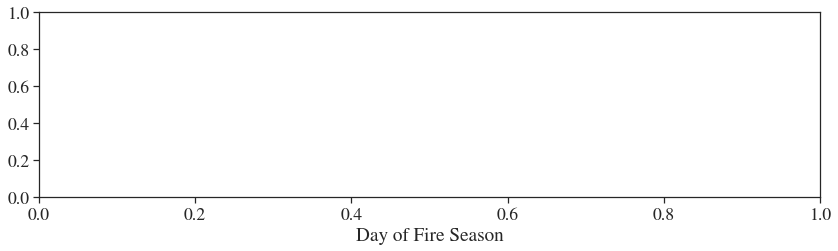

In [475]:
#plt.rcParams['figure.figsize'] = [15,4]

#font = {'family' : 'DejaVu Sans',
#        'weight' : 'normal',
#        'size'   : 20}

#plt.rc('font', **font)

#fig = plt.figure()
#ax = fig.add_subplot(1,1,1)

fire = X_grid_dict_nw[1][0].num_det.values

YEARS = list(range(2007, 2017))



for T_K in [1,5]:
    print(f'T_K={T_K}')
    
    poisson_all = []
    aug_persist_all = []
    persist_all = []
    
    for YEAR in YEARS:
        print('YEAR=%d' % YEAR, end=' ')


        filter_mask = X_grid_dict_nw[1][0].filter_mask.values[:,:,start_ind:end_ind]

        OFF1 = 0
        OFF2 = -1

        start_ind = 110*(YEAR-2007)
        end_ind = 110*(1+(YEAR-2007))

        fire_year = fire[:,:,start_ind:end_ind]

        persistence_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),fire_year[:,:,:-T_K]], axis=2))


        pred_year = pred_dict_hurdle_poisson_vpd_ar_separated[T_K][:,:,start_ind:end_ind]

        shifted_pred = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year[:,:,:-(T_K)]], axis=2))

        pred_year2 = pred_dict_aug[T_K][:,:,start_ind:end_ind]
        shifted_pred2 = np.array(np.concatenate([np.zeros((33,55,T_K)),pred_year2[:,:,:-(T_K)]], axis=2))

        fire_days = np.sum(fire_year[filter_mask].reshape((-1,110)), axis=(0))
        persistence_days = np.sum(persistence_pred[filter_mask].reshape((-1,110)), axis=(0))
        pred_days = np.sum(shifted_pred[filter_mask].reshape((-1,110)), axis=(0))
        pred_days2 = np.sum(shifted_pred2[filter_mask].reshape((-1,110)), axis=(0))


        #plt.plot(fire_days[OFF1:OFF2], color='black', linewidth=2.0, label='Observed')
        #plt.plot(pred_days[OFF1:OFF2], label='Poisson')
        #plt.plot(pred_days2[OFF1:OFF2], label='Aug. Persistence')


        months, days = X_grid_dict_nw[1][0].time.dt.month, X_grid_dict_nw[1][0].time.dt.day
        date_strings = ['%d/%02d' % (month,day) for (month,day) in zip(months,days)]
        #_ = plt.xticks(ticks_pos, date_strings[::20])
        #plt.setp(ax.get_xticklabels(), visible=False)

        #ticks_pos = np.arange(0,len(diff1[OFF1:OFF2]),5)
        #_ = plt.xticks(ticks_pos)
        #_ = plt.xticks(ticks_pos, date_strings[OFF1:OFF2:5])

        #plt.xlabel('Day of Fire Season')
        #plt.ylabel('# of Detections')
        #plt.legend()
        ##plt.title('Region-level Predictions (%d)' % YEAR)


        #ax = fig.add_subplot(3,1,2)


        diff1 = ((fire_days - pred_days)**2)#[persistence_days>0]
        diff2 = ((fire_days - pred_days2)**2)#[persistence_days>0]
        diff_persistence = ((fire_days - persistence_days)**2)#[persistence_days>0]

        #plt.plot(np.sqrt(diff1[OFF1:OFF2]), label='Poisson (+%d)' % T_K)
        #plt.plot(np.sqrt(diff2[OFF1:OFF2]), label='Persistence Aug (+%d)' % (T_K))

        #plt.setp(ax.get_xticklabels(), visible=False)



        #plt.ylabel('RMSE')

        #ax = fig.add_subplot(3,1,3)

        diff1_ = (pred_days - fire_days)
        diff2_ = (pred_days2 - fire_days)

        #plt.plot(diff1_[OFF1:OFF2], label='Poisson (+%d)' % T_K)
        #plt.plot(diff2_[OFF1:OFF2], label='Persistence Aug (+%d)' % (T_K))

        #plt.axhline(linewidth=1, linestyle='--', color='black')



        #plt.ylabel('Difference')
        #plt.xlabel('Day of Fire Season')

        #plt.legend()



        pois = np.sqrt(np.mean(diff1[OFF1:OFF2])/(33*55))
        aug_pers = np.sqrt(np.mean(diff2[OFF1:OFF2])/(33*55))
        pers = np.sqrt(np.mean(diff_persistence[OFF1:OFF2])/(33*55))

        poisson_all.append(pois)
        aug_persist_all.append(aug_pers)
        persist_all.append(pers)

        #print('Poisson (+%d) MSE: %f' % (T_K, pois))
        #print('Aug Persistence (+%d) MSE: %f' % ((T_K), aug_pers))
        #print('Persistence (+%d) MSE: %f' % ((T_K), pers))


        mse_1 = np.mean((fire_year - shifted_pred)**2)
        mse_2 = np.mean((fire_year - shifted_pred2)**2)

        plt.xlabel('Day of Fire Season')


        fig.tight_layout()

    print()

    print('Poisson Mean MSE: %f' % np.mean(poisson_all))
    print('Aug Pers Mean MSE: %f' % np.mean(aug_persist_all))
    print('Pers Mean MSE: %f' % np.mean(persist_all))

    print('Poisson STD MSE: %f' % np.std(poisson_all))
    print('Aug Pers STD MSE: %f' % np.std(aug_persist_all))
    print('Pers Mean STD: %f' % np.std(persist_all))

    persist_all = np.round(persist_all + [np.mean(persist_all),np.std(persist_all)], 2)
    aug_persist_all = np.round(aug_persist_all + [np.mean(aug_persist_all),np.std(aug_persist_all)], 2)
    poisson_all = np.round(poisson_all + [np.mean(poisson_all),np.std(poisson_all)], 2)

    print(tabulate(zip(YEARS+['Mean', 'Std. Dev'], persist_all,
                       aug_persist_all,
                       poisson_all), tablefmt='latex_raw', floatfmt='.2f'))

In [15]:
def compute_ignition_rankings(y_pred, X, mask=np.ones((33,55), dtype=bool)):
    for k in range(1,5):       
        pred = y_pred[k][mask].flatten()   
        
        #print(pred[:10])
        y = X[k][0].num_det_target.values[mask].flatten()
        ign = (X[k][0].num_det.values[mask].flatten()==0) & (X[k][0].num_det_1.values[mask].flatten()==0)
        
        print(np.sum(y[ign]>0), len(y), np.sum(y[ign]>0)/len(y))
        #NUM = np.sum(y[ign]>0)
        NUM = 100
        
        vals = list(zip(pred[ign],y[ign]))
        
        #print(vals[-10:])
        
        vals.sort(key=lambda x: x[0])
        
        num_igns = np.sum([v[1]>0 for v in vals[-NUM:]])
        
        print('Results (k=%d)' % k, num_igns, num_igns/NUM, np.sum(y[ign]>0)/len(y)*NUM)
    
        print(vals[:10])
        print(vals[-10:])
    

In [22]:
import random as rand
def compute_ignition_rankings_plot(y_pred, X, k, label=None, random=False, optimal=False, 
                                   mask=np.ones((33,55), dtype=bool), plot=True):
          
    pred = y_pred[k][mask].flatten()   

    #print(pred[:10])
    y = X[k][0].num_det_target.values[mask].flatten()
    ign = (X[k][0].num_det.values[mask].flatten()==0) & (X[k][0].num_det_1.values[mask].flatten()==0)
    
    #print(np.sum(y[ign]>0), len(y), np.sum(y[ign]>0)/len(y))
    #NUM = np.sum(y[ign]>0)
    NUM = 100

    vals = list(zip(pred[ign],y[ign]))

    #print(vals[-10:])
    vals.sort(key=lambda x: x[0])

    num_igns = np.sum([v[1]>0 for v in vals[-NUM:]])

    #print('Results (k=%d)' % k, num_igns, num_igns/NUM, np.sum(y[ign]>0)/len(y)*NUM)


    order_ign = [v[1] for v in vals][::-1]
    
    if random:
        rand.shuffle(order_ign)
        
    if optimal:
        order_ign.sort(reverse=True)
    
    cum_sum = np.cumsum(order_ign)/np.sum(order_ign)
    
    if plot:
        plt.plot(cum_sum, label=label)
    
    return cum_sum

In [23]:
def downsample(data, rate):
    return data[::rate]

def plot_downsample(data, label, rate=4):
    data = downsample(data, rate)
    print(data.shape)
    plt.plot(data, label=label)

In [27]:
# pred_dict_hurdle_poisson_ar_vpd_separated = {k: hurdle_poisson_vpd_ar_separated_ac1_insample['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}

pred_dict_hurdle_poisson_ar_vpd_separated = {k: hurdle_poisson_vpd_ar_vpd_ign_log_vpd_add_separated_insample['models'][k-1][0].predict(X_grid_dict_nw[k], shape=(33,55,1100)) for k in [1,2,3,4,5]}


Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log
Pred - Log


In [28]:
N = 100
K = 5
mins_5 = maxs_5 = compute_ignition_rankings_plot(pred_dict_hurdle_poisson_ar_vpd_separated, X_grid_dict_nw, 5,  random=True, plot=False)

for i in range(N-1):
    vals = compute_ignition_rankings_plot(pred_dict_hurdle_poisson_ar_vpd_separated, X_grid_dict_nw, 5,  random=True, plot=False)
    mins_5 = np.minimum(mins_5, vals)
    maxs_5 = np.maximum(maxs_5, vals)
    print(i, end=' ')
print()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 


(99329,)
(99329,)
(5,)


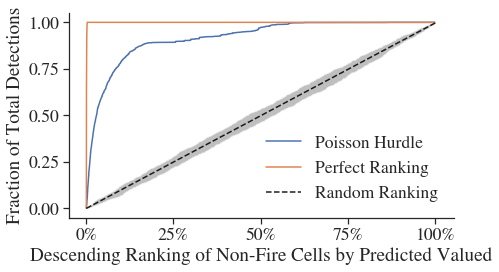

In [40]:
from math import ceil
set_font((FIG_REG_WIDTH,FIG_REG_WIDTH/FIG_REG_ASPECT_RATIO))
K = 5

#fig = plt.figure()

#ax = fig.add_subplot(1,1,1)

#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle_temp_humid, X_grid_dict_nw, K, 'Hurdle (Temp/Humid)')
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K, 'Poisson Hurdle')
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle_log_vpd, X_grid_dict_nw, K, 'Poisson Hurdle (log VPD)')
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K, 'True Ranking', optimal=True)
#plt.fill_between(np.arange(mins.size), mins, maxs, facecolor='red', interpolate=True, alpha=.5)
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K, random=True)
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K,  random=True)
#compute_ignition_rankings_plot(pred_dict_hurdle_logistic, X_grid_dict_nw, K, 'Logistic', optimal=False)



#plt.plot([0,pred_dict_hurdle_hurdle[1].size], [0,1], 'k--', label='Random Ranking')


plt.ylabel('Frac. of Total Detections')
#plt.xlabel('Descending Ranking of Non-active Cells by Predicted Valued')

#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plt.setp(ax.get_xticklabels(), visible=False)

#ax = fig.add_subplot(2,1,2)
K = 5
DOWNSAMPLE_RATE = 20

#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle_temp_humid, X_grid_dict_nw, K, 'Hurdle (Temp/Humid)')

res = compute_ignition_rankings_plot(pred_dict_hurdle_poisson_ar_vpd_separated, X_grid_dict_nw, K, 'Poisson Hurdle', plot=False)
perfect = compute_ignition_rankings_plot(pred_dict_hurdle_poisson_ar_vpd_separated, X_grid_dict_nw, K, 'Perfect Ranking', optimal=True, plot=False)



plot_downsample(res, 'Poisson Hurdle', rate=DOWNSAMPLE_RATE)

plot_downsample(perfect, 'Perfect Ranking', rate=DOWNSAMPLE_RATE)

#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle_log_vpd, X_grid_dict_nw, K, 'Poisson Hurdle (log VPD)')
plt.fill_between(np.arange(ceil(mins_5.size/DOWNSAMPLE_RATE)), 
                 downsample(mins_5, rate=DOWNSAMPLE_RATE),
                 downsample(maxs_5, rate=DOWNSAMPLE_RATE),
                 facecolor='gray', interpolate=True, alpha=.5)
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K, random=True)
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K,  random=True)
#compute_ignition_rankings_plot(pred_dict_hurdle_logistic, X_grid_dict_nw, K, 'Logistic', optimal=False)



plt.plot([0,ceil(pred_dict_hurdle_poisson_ar_vpd_separated[1].size/DOWNSAMPLE_RATE)], [0,1], 'k--', label='Random Ranking')


plt.ylabel('Fraction of Total Detections')
plt.xlabel('Descending Ranking of Non-Fire Cells by Predicted Valued')

x,_ = plt.xticks()
x_values = np.linspace(0,ceil(mins_5.size/DOWNSAMPLE_RATE), 5)
print(x_values.shape)
plt.xticks(x_values, list(map(lambda x: str(x)+'%', (np.round(x_values/ (mins_5.size//DOWNSAMPLE_RATE),2)*100).astype(int))))


plt.legend()

plt.tight_layout()

sb.despine()

if SAVE_FIGS:
    plt.savefig(os.path.join(FIGURES_DIR, 'ignitions_ranking.pdf'))

(99329,)
(99329,)
(5,)


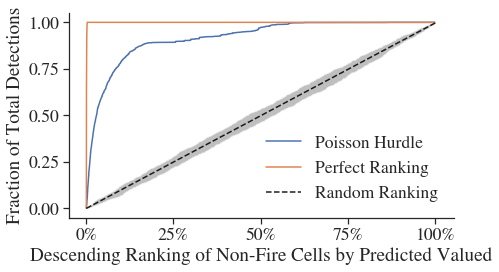

In [37]:
from math import ceil
set_font((FIG_REG_WIDTH,FIG_REG_WIDTH/FIG_REG_ASPECT_RATIO))
K = 5

#fig = plt.figure()

#ax = fig.add_subplot(2,1,1)

#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle_temp_humid, X_grid_dict_nw, K, 'Hurdle (Temp/Humid)')
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K, 'Poisson Hurdle')
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle_log_vpd, X_grid_dict_nw, K, 'Poisson Hurdle (log VPD)')
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K, 'True Ranking', optimal=True)
#plt.fill_between(np.arange(mins.size), mins, maxs, facecolor='red', interpolate=True, alpha=.5)
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K, random=True)
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K,  random=True)
#compute_ignition_rankings_plot(pred_dict_hurdle_logistic, X_grid_dict_nw, K, 'Logistic', optimal=False)



#plt.plot([0,pred_dict_hurdle_hurdle[1].size], [0,1], 'k--', label='Random Ranking')


plt.ylabel('Frac. of Total Detections')
#plt.xlabel('Descending Ranking of Non-active Cells by Predicted Valued')

#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plt.setp(ax.get_xticklabels(), visible=False)

#ax = fig.add_subplot(2,1,2)
K = 5
DOWNSAMPLE_RATE = 20

#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle_temp_humid, X_grid_dict_nw, K, 'Hurdle (Temp/Humid)')

res = compute_ignition_rankings_plot(pred_dict_hurdle_poisson_ar_vpd_separated, X_grid_dict_nw, K, 'Poisson Hurdle', plot=False)
perfect = compute_ignition_rankings_plot(pred_dict_hurdle_poisson_ar_vpd_separated, X_grid_dict_nw, K, 'Perfect Ranking', optimal=True, plot=False)



plot_downsample(res, 'Poisson Hurdle', rate=DOWNSAMPLE_RATE)

plot_downsample(perfect, 'Perfect Ranking', rate=DOWNSAMPLE_RATE)

#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle_log_vpd, X_grid_dict_nw, K, 'Poisson Hurdle (log VPD)')
plt.fill_between(np.arange(ceil(mins_5.size/DOWNSAMPLE_RATE)), 
                 downsample(mins_5, rate=DOWNSAMPLE_RATE),
                 downsample(maxs_5, rate=DOWNSAMPLE_RATE),
                 facecolor='gray', interpolate=True, alpha=.5)
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K, random=True)
#compute_ignition_rankings_plot(pred_dict_hurdle_hurdle, X_grid_dict_nw, K,  random=True)
#compute_ignition_rankings_plot(pred_dict_hurdle_logistic, X_grid_dict_nw, K, 'Logistic', optimal=False)



plt.plot([0,ceil(pred_dict_hurdle_poisson_ar_vpd_separated[1].size/DOWNSAMPLE_RATE)], [0,1], 'k--', label='Random Ranking')


plt.ylabel('Fraction of Total Detections')
plt.xlabel('Descending Ranking of Non-Fire Cells by Predicted Valued')

x,_ = plt.xticks()
x_values = np.linspace(0,ceil(mins_5.size/DOWNSAMPLE_RATE), 5)
print(x_values.shape)
plt.xticks(x_values, list(map(lambda x: str(x)+'%', (np.round(x_values/ (mins_5.size//DOWNSAMPLE_RATE),2)*100).astype(int))))


plt.legend()

plt.tight_layout()

sb.despine()

if SAVE_FIGS:
    plt.savefig(os.path.join(FIGURES_DIR, 'ignitions_ranking.pdf'))

In [84]:
from helper.geometry import LatLonBoundingBox

In [85]:
ALASKA_BB.get()

(55.0, 71.0, -165.0, -138.0)

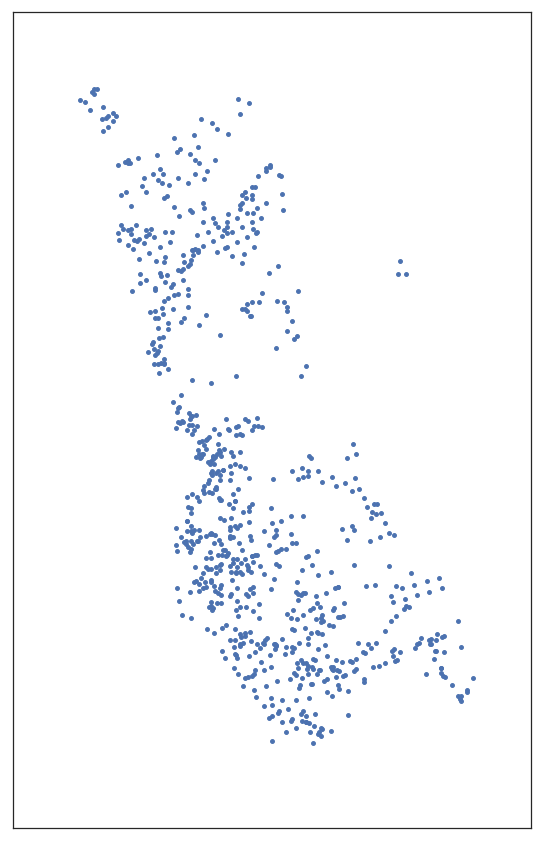

In [135]:
plt.rcParams['figure.figsize'] = [10,15]


font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

ALASKA_BB = get_default_bounding_box()
YEAR_SEL = 2007

mp = vmap.make_map(LatLonBoundingBox(68.8,69.5,-151.25,-150), (0,0,0,0))
mp.drawlsmask(land_color='w', ocean_color=(30./256,144./256,255./256,.3))


year = np.array(list(map(lambda x: x.year, np.array(modis_df.datetime_local))))==YEAR_SEL
a = year & np.array(list(map(lambda x: x.dayofyear, np.array(modis_df.datetime_local))))==0

b = year & np.array(list(map(lambda x: x.dayofyear, np.array(modis_df.datetime_local))))==1

sel_df = modis_df[a]
_ = mp.scatter(list(sel_df.lon), list(sel_df.lat), 15, latlon=True, marker='o', color='b')

sel_df = modis_df[b]
#_ = mp.scatter(list(sel_df.lon), list(sel_df.lat), 15, latlon=True, marker='o', color='r')
#_ = plt.title('Detections for %d' % YEAR_SEL)